In [83]:
import pandas as pd
import json 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [127]:
# definition of the extraction data
# to extract car overview
def car_overview_dict_creator(overview):
    overview_dict = json.loads(overview.replace("'", '"').replace('None', "1"))
    all_overviews = {}
    for dictionary in overview_dict['top']:
        all_overviews.update({dictionary['key']: dictionary['value']})
    return all_overviews
# to extract car feature
def car_feature_dict_creator(feature):
  all_features = {}
  feature_dict = json.loads(feature.replace("'", '"').replace('None', "1"))
  for dictionary in feature_dict['top']:
    all_features.update({dictionary['value']: True})
    for section in feature_dict.get('data', []):
      for item in section.get('list', []):
        all_features.update({item['value']: True})
  return all_features
# extract car specs
def car_spec_dict_creator(spec):
    all_specs = {}
    specs_dict = json.loads(spec.replace("'", '"').replace('None', "null"))
    for dictionary in specs_dict.get('top', []):
      all_specs.update({dictionary['key']: dictionary['value']})
    # Extract nested specifications
    for dictionary in specs_dict.get('data', []):
      for item in dictionary.get('list', []):
        all_specs.update({item['key'] : item['value']})
    return all_specs

In [128]:
df = pd.read_excel("D:/Guvi/Capstone/CarDekho_3/Gvn Dataset/bangalore_cars.xlsx")
#to extract car detail
df.new_car_detail=df['new_car_detail'].apply(lambda x : json.loads(x.replace("'",'"').replace('None',"1")))
df_car_detail = pd.DataFrame(df.new_car_detail.to_list())
# to extract car overview
df.new_car_overview = df['new_car_overview'].apply(lambda overview: car_overview_dict_creator(overview))
df_car_overview = pd.DataFrame(df.new_car_overview.to_list())
# to extract car feature
feature = pd.DataFrame(df.new_car_feature)
feature = feature.rename(columns={feature.columns[0]: 'feature'})
df = df.merge(feature, left_index=True, right_index=True)
df['feature_dict'] = df['feature'].apply(car_feature_dict_creator)
feature_df = pd.json_normalize(df['feature_dict']).fillna(False).astype(int)
# extract car specs
df['new_car_specs'] = df['new_car_specs'].apply(lambda spec: car_spec_dict_creator(spec))
df_car_specs = pd.DataFrame(df['new_car_specs'].tolist())
df_bangalore = pd.concat([df_car_detail,df_car_overview,feature_df, df_car_specs], axis=1)
df_bangalore ['city'] = 'Bangalore'
df_bangalore.to_csv('structured_bangalore_cars.csv', index=False)

In [129]:
#2
df = pd.read_excel("D:/Guvi/Capstone/CarDekho_3/Gvn Dataset/chennai_cars.xlsx")
#to extract car detail
df.new_car_detail=df['new_car_detail'].apply(lambda x : json.loads(x.replace("'",'"').replace('None',"1")))
df_car_detail = pd.DataFrame(df.new_car_detail.to_list())
# to extract car overview
df.new_car_overview = df['new_car_overview'].apply(lambda overview: car_overview_dict_creator(overview))
df_car_overview = pd.DataFrame(df.new_car_overview.to_list())
# to extract car feature
feature = pd.DataFrame(df.new_car_feature)
feature = feature.rename(columns={feature.columns[0]: 'feature'})
df = df.merge(feature, left_index=True, right_index=True)
df['feature_dict'] = df['feature'].apply(car_feature_dict_creator)
feature_df = pd.json_normalize(df['feature_dict']).fillna(False).astype(int)
# extract car specs
df['new_car_specs'] = df['new_car_specs'].apply(lambda spec: car_spec_dict_creator(spec))
df_car_specs = pd.DataFrame(df['new_car_specs'].tolist())
df_chennai = pd.concat([df_car_detail,df_car_overview,feature_df, df_car_specs], axis=1)
df_chennai ['city'] = 'Chennai'
df_chennai.to_csv('structured_chennai_cars.csv', index=False)

In [130]:
#3
df = pd.read_excel("D:/Guvi/Capstone/CarDekho_3/Gvn Dataset/delhi_cars.xlsx")
#to extract car detail
df.new_car_detail=df['new_car_detail'].apply(lambda x : json.loads(x.replace("'",'"').replace('None',"1")))     
df_car_detail = pd.DataFrame(df.new_car_detail.to_list())
# to extract car overview
df.new_car_overview = df['new_car_overview'].apply(lambda overview: car_overview_dict_creator(overview))
df_car_overview = pd.DataFrame(df.new_car_overview.to_list())
# to extract car feature
feature = pd.DataFrame(df.new_car_feature)
feature = feature.rename(columns={feature.columns[0]: 'feature'}) 
df = df.merge(feature, left_index=True, right_index=True)
df['feature_dict'] = df['feature'].apply(car_feature_dict_creator)
feature_df = pd.json_normalize(df['feature_dict']).fillna(False).astype(int)
# extract car specs
df['new_car_specs'] = df['new_car_specs'].apply(lambda spec: car_spec_dict_creator(spec))
df_car_specs = pd.DataFrame(df['new_car_specs'].tolist())
df_delhi = pd.concat([df_car_detail,df_car_overview,feature_df, df_car_specs], axis=1)
df_delhi ['city'] = 'Delhi'
df_delhi.to_csv('structured_delhi_cars.csv', index=False)

In [131]:
#4
df = pd.read_excel("D:/Guvi/Capstone/CarDekho_3/Gvn Dataset/hyderabad_cars.xlsx")
#to extract car detail
df.new_car_detail=df['new_car_detail'].apply(lambda x : json.loads(x.replace("'",'"').replace('None',"1")))
df_car_detail = pd.DataFrame(df.new_car_detail.to_list())
# to extract car overview
df.new_car_overview = df['new_car_overview'].apply(lambda overview: car_overview_dict_creator(overview))
df_car_overview = pd.DataFrame(df.new_car_overview.to_list())
# to extract car feature
feature = pd.DataFrame(df.new_car_feature)
feature = feature.rename(columns={feature.columns[0]: 'feature'})
df = df.merge(feature, left_index=True, right_index=True)
df['feature_dict'] = df['feature'].apply(car_feature_dict_creator)
feature_df = pd.json_normalize(df['feature_dict']).fillna(False).astype(int)
# extract car specs
df['new_car_specs'] = df['new_car_specs'].apply(lambda spec: car_spec_dict_creator(spec))
df_car_specs = pd.DataFrame(df['new_car_specs'].tolist())
df_hyderabad = pd.concat([df_car_detail,df_car_overview,feature_df, df_car_specs], axis=1)
df_hyderabad ['city'] = 'Hyderabad'
df_hyderabad.to_csv('structured_hyderabad_cars.csv', index=False)

In [132]:
#5
df = pd.read_excel("D:/Guvi/Capstone/CarDekho_3/Gvn Dataset/jaipur_cars.xlsx")
#to extract car detail
df.new_car_detail=df['new_car_detail'].apply(lambda x : json.loads(x.replace("'",'"').replace('None',"1")))
df_car_detail = pd.DataFrame(df.new_car_detail.to_list())
# to extract car overview
df.new_car_overview = df['new_car_overview'].apply(lambda overview: car_overview_dict_creator(overview))
df_car_overview = pd.DataFrame(df.new_car_overview.to_list())
# to extract car feature
feature = pd.DataFrame(df.new_car_feature)
feature = feature.rename(columns={feature.columns[0]: 'feature'})
df = df.merge(feature, left_index=True, right_index=True)
df['feature_dict'] = df['feature'].apply(car_feature_dict_creator)
feature_df = pd.json_normalize(df['feature_dict']).fillna(False).astype(int)
# extract car specs
df['new_car_specs'] = df['new_car_specs'].apply(lambda spec: car_spec_dict_creator(spec))
df_car_specs = pd.DataFrame(df['new_car_specs'].tolist())
df_jaipur = pd.concat([df_car_detail,df_car_overview,feature_df, df_car_specs], axis=1)
df_jaipur ['city'] = 'Jaipur'
df_jaipur.to_csv('structured_jaipur_cars.csv', index=False)

In [133]:
#6
df = pd.read_excel("D:/Guvi/Capstone/CarDekho_3/Gvn Dataset/kolkata_cars.xlsx")
#to extract car detail
df.new_car_detail=df['new_car_detail'].apply(lambda x : json.loads(x.replace("'",'"').replace('None',"1")))
df_car_detail = pd.DataFrame(df.new_car_detail.to_list())
# to extract car overview
df.new_car_overview = df['new_car_overview'].apply(lambda overview: car_overview_dict_creator(overview))
df_car_overview = pd.DataFrame(df.new_car_overview.to_list())
# to extract car feature
feature = pd.DataFrame(df.new_car_feature)
feature = feature.rename(columns={feature.columns[0]: 'feature'})
df = df.merge(feature, left_index=True, right_index=True)
df['feature_dict'] = df['feature'].apply(car_feature_dict_creator)
feature_df = pd.json_normalize(df['feature_dict']).fillna(False).astype(int)
# extract car specs
df['new_car_specs'] = df['new_car_specs'].apply(lambda spec: car_spec_dict_creator(spec))
df_car_specs = pd.DataFrame(df['new_car_specs'].tolist())
df_kolkata = pd.concat([df_car_detail,df_car_overview,feature_df, df_car_specs], axis=1)
df_kolkata ['city'] = 'Kolkata'
df_kolkata.to_csv('structured_kolkata_cars.csv', index=False)

In [134]:
csv_files=['structured_bangalore_cars.csv','structured_chennai_cars.csv','structured_delhi_cars.csv','structured_hyderabad_cars.csv','structured_jaipur_cars.csv','structured_kolkata_cars.csv' ]
dataframes = []
for i in csv_files:
    df=pd.read_csv(i)
    dataframes.append(df)
car_deatils = "car_details.csv" 
concatenated_df = pd.concat(dataframes, ignore_index=True)
concatenated_df.to_csv(car_deatils, index=False)
print(f"Concatenated CSV saved as {car_deatils}")

Concatenated CSV saved as car_details.csv


In [135]:
car_details = "car_details.csv" 

In [136]:
df = pd.read_csv('car_details.csv', low_memory=False)
df.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,city
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,NaN,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,NaN,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,NaN,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,NaN,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16,NaN,Bangalore


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Columns: 241 entries, it to city
dtypes: float64(11), int64(175), object(55)
memory usage: 15.4+ MB


In [14]:
df.dtypes

it                           int64
ft                          object
bt                          object
km                          object
transmission                object
                             ...  
Cargo Volumn                object
Wheel Size                  object
Alloy Wheel Size            object
Ground Clearance Unladen    object
city                        object
Length: 241, dtype: object

In [15]:
print(df.columns)

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear',
       ...
       'Rear Brake Type', 'Top Speed', 'Acceleration', 'Tyre Type',
       'No Door Numbers', 'Cargo Volumn', 'Wheel Size', 'Alloy Wheel Size',
       'Ground Clearance Unladen', 'city'],
      dtype='object', length=241)


In [16]:
missing_details = (df.isnull().sum()/len(df))*100
missing_details

it                           0.000000
ft                           0.000000
bt                           0.047795
km                           0.000000
transmission                 0.000000
                              ...    
Cargo Volumn                19.034532
Wheel Size                  35.643446
Alloy Wheel Size            35.643446
Ground Clearance Unladen    93.846338
city                         0.000000
Length: 241, dtype: float64

In [137]:
df.copy()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,city
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,NaN,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,Drum,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,NaN,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,NaN,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,NaN,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16,NaN,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,Drum,NaN,NaN,"Tubeless, Radial",5.0,313,NaN,NaN,NaN,Kolkata
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,Drum,140 kmph,19 Seconds,Tubeless Tyres,5.0,177-litres,NaN,NaN,NaN,Kolkata
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,Solid Disc,230km/hr,8.8 Seconds,"Tubeless,Radial",4.0,475-litres,17,17,NaN,Kolkata
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,Drum,156 Kmph,15 Seconds,"Tubeless,Radial",5.0,236-liters,14,14,NaN,Kolkata


In [138]:
df = df.drop(columns=['trendingText'], axis=1) # removing because contains only link

In [139]:
df['priceFixedText'] = df['priceFixedText'].replace(1, np.nan)
df = df.drop(columns=['priceFixedText'], axis=1) # removing because column contains full of nan values 

In [140]:
df = df.drop(columns=['owner','Alloy Wheel Size','priceSaving','km'], axis=1) # coming twice

In [141]:
def convert_to_lakhs(price_str):
    price_str = price_str.replace('₹', '').replace(',', '').strip()
    if 'Crore' in price_str:
        return float(price_str.replace('Crore', '')) * 100
    elif 'Lakh' in price_str:
        return float(price_str.replace('Lakh', ''))
    elif 'Thousand' in price_str:
        return float(price_str.replace('Thousand', '')) / 100
    else:
        return float(price_str)
df['price'] = df['price'].apply(convert_to_lakhs)

In [142]:
import re
# Function to identify columns with unit values
def find_columns_with_units(df):
    # Updated pattern to avoid capturing groups
    unit_pattern = re.compile(r'\d+\s?(?:km|Kmph|seconds|litres|kmph|km/hr|Kmph|mm|inch|kg|hp|bhp|lakhs|bhp|rpm|CC|₹|,|(PS)|)', re.IGNORECASE)
    columns_with_units = []
    for col in df.columns:
        if df[col].dtype == 'object':  # Check only object (string) columns
            # Use regex without capturing groups
            if df[col].str.contains(unit_pattern, regex=True).any():
                columns_with_units.append(col)
    return columns_with_units
# Identify columns with unit values
columns_with_units = find_columns_with_units(df)
print("Columns with unit values:", columns_with_units)

C:\Users\Madhava\AppData\Local\Temp\ipykernel_13848\2642157274.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if df[col].str.contains(unit_pattern, regex=True).any():


Columns with unit values: ['model', 'variantName', 'priceActual', 'Registration Year', 'Insurance Validity', 'Seats', 'Kms Driven', 'RTO', 'Engine Displacement', 'Mileage', 'Engine', 'Max Power', 'Torque', 'Engine Type', 'Max Torque', 'Value Configuration', 'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio', 'Length', 'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type', 'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed', 'Acceleration', 'Cargo Volumn', 'Wheel Size', 'Ground Clearance Unladen']


In [143]:
import re
import numpy as np
unit_pattern = re.compile(r'\d+\s?(?:km|Kmph|seconds|litres|kmph|km/hr|Kmph|mm|inch|kg|hp|bhp|Lakh|bhp|rpm|CC|₹|,|PS)', re.IGNORECASE)
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Function to remove units from the specified columns
def find_and_clean_columns_with_units(df):
    columns_with_units = []
    for col in df.columns:
        if df[col].dtype == 'object':  # Check only object (string) columns
            if df[col].str.contains(unit_pattern, regex=True).any():
                # Remove the units and convert to numeric
                # Remove everything except digits and a single decimal point
                df[col] = df[col].str.extract(r'(\d+\.\d+|\d+)')[0].replace('', np.nan).astype(float)
                columns_with_units.append(col)
    return columns_with_units
# Apply the function to identify and clean the columns
columns_with_units = find_and_clean_columns_with_units(df)

In [144]:
for i in df.columns:  #dropping null values _more than 50 percentage
    if (df[i].isnull().sum()/len(df))*100>=50:
        df.drop(i,axis=1,inplace=True)

In [145]:
df.columns

Index(['it', 'ft', 'bt', 'transmission', 'ownerNo', 'oem', 'model',
       'modelYear', 'centralVariantId', 'price',
       ...
       'Seating Capacity', 'Steering Type', 'Turning Radius', 'Top Speed',
       'Acceleration', 'Tyre Type', 'No Door Numbers', 'Cargo Volumn',
       'Wheel Size', 'city'],
      dtype='object', length=227)

In [146]:
# Function to identify and convert object columns to numeric if possible
def convert_object_columns(df):
    converted_columns = []  
    for col in df.columns:
        if df[col].dtype == 'object':  # Check if the column is of type object
            try:
                # Attempt to convert the column to numeric (handling commas and other common separators)
                df[col] = df[col].str.replace(',', '').astype(float)
                converted_columns.append(col)
            except ValueError:
                # If conversion fails, the column remains as an object
                continue
    return converted_columns
# Apply the function to convert appropriate columns
converted_columns = convert_object_columns(df)
# Display the columns that were successfully converted
print("Columns converted to numeric:", converted_columns)
# Optional: Check the data types of the dataframe after conversion
print(df.dtypes)

Columns converted to numeric: []
it                   int64
ft                  object
bt                  object
transmission        object
ownerNo              int64
                    ...   
Tyre Type           object
No Door Numbers    float64
Cargo Volumn       float64
Wheel Size          object
city                object
Length: 227, dtype: object


In [147]:
df[["modelYear","Year of Manufacture","Registration Year"]]

,modelYear,Year of Manufacture,Registration Year
0,2015,2015.0,2015
1,2018,2018.0,Feb 2018
2,2018,2018.0,Sept 2018
3,2014,2014.0,Dec 2014
4,2015,2015.0,2015
...,...,...,...
8364,2022,2022.0,2022
8365,2014,2014.0,2014
8366,2011,2011.0,2011
8367,2012,2012.0,2012


In [148]:
import random
# Get numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns
# Randomly select 5 numeric columns
sampled_columns = random.sample(list(numeric_columns), 5)
# Check and print data types of sampled columns
for column in sampled_columns:
    print(f"Column '{column}' has data type: {df[column].dtype}")

Column 'Power Antenna' has data type: int64
Column 'LEDFog Lamps' has data type: int64
Column 'Seating Capacity' has data type: float64
Column 'modelYear' has data type: int64
Column 'Projector Headlamps' has data type: int64


In [149]:
from sklearn.impute import SimpleImputer
# Impute missing values
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_mode = SimpleImputer(strategy='most_frequent') 
# Calculate overall skewness (e.g., mean skewness)
# Make sure numerical_cols only contains valid columns present in df
numerical_cols = [col for col in numerical_cols if col in df.columns] 
overall_skewness = df[numerical_cols].skew().mean() 
if overall_skewness < 0.4 and overall_skewness > -0.4:
    df[numerical_cols] = imputer_mean.fit_transform(df[numerical_cols]) 
else:
    imputed_data = imputer_median.fit_transform(df[numerical_cols])
    imputed_columns = imputer_median.get_feature_names_out()
    df[imputed_columns] = pd.DataFrame(imputed_data, columns=imputed_columns, index=df.index)
# Categorical columns: use most frequent (mode)
categorical_cols = [col for col in categorical_cols if col in df.columns] 
df[categorical_cols] = imputer_mode.fit_transform(df[categorical_cols])
# Check the results of imputation
df_imputed_head = df.head()
df_imputed_info = df.info()
df_imputed_head, df_imputed_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Columns: 227 entries, it to city
dtypes: float64(185), object(42)
memory usage: 14.5+ MB


(    it      ft         bt transmission  ownerNo      oem               model  \
 0  0.0  Petrol  Hatchback       Manual      3.0   Maruti      Maruti Celerio   
 1  0.0  Petrol        SUV       Manual      2.0     Ford       Ford Ecosport   
 2  0.0  Petrol  Hatchback       Manual      1.0     Tata          Tata Tiago   
 3  0.0  Petrol      Sedan       Manual      1.0  Hyundai       Hyundai Xcent   
 4  0.0  Diesel        SUV       Manual      1.0   Maruti  Maruti SX4 S Cross   
 
    modelYear  centralVariantId  price  ... Seating Capacity Steering Type  \
 0     2015.0            3979.0   4.00  ...              5.0         Power   
 1     2018.0            6087.0   8.11  ...              5.0         Power   
 2     2018.0            2983.0   5.85  ...              5.0         Power   
 3     2014.0            1867.0   4.62  ...              5.0         Power   
 4     2015.0            4277.0   7.90  ...              5.0         Power   
 
   Turning Radius Top Speed Acceleration  

In [150]:
df["Year of Manufacture"] = df["Year of Manufacture"].astype(int)
df["modelYear"] = df["modelYear"].astype(int)

In [151]:
df[["modelYear","Year of Manufacture"]]

,modelYear,Year of Manufacture
0,2015,2015
1,2018,2018
2,2018,2018
3,2014,2014
4,2015,2015
...,...,...
8364,2022,2022
8365,2014,2014
8366,2011,2011
8367,2012,2012


In [152]:
df["price"].skew()

9.422088515809346

{'whiskers': [<matplotlib.lines.Line2D at 0x244e67d9b90>,
 'caps': [<matplotlib.lines.Line2D at 0x244e2a5b010>,
 'boxes': [<matplotlib.lines.Line2D at 0x244e67daa10>],
 'medians': [<matplotlib.lines.Line2D at 0x244e3dd2290>],
 'fliers': [<matplotlib.lines.Line2D at 0x244d7a3af10>],
 'means': []}

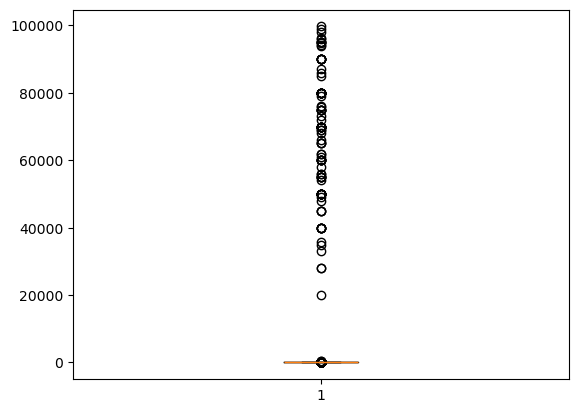

In [153]:
plt.boxplot(df["price"])

In [154]:
df.describe()

,it,ownerNo,modelYear,centralVariantId,price,Year of Manufacture,Power Steering,Power Windows Front,Power Windows Rear,Remote Trunk Opener,...,Smart Key Band,Lane Watch Camera,Removable Convertible Top,Power Folding3rd Row Seat,Seats.1,Displacement,No of Cylinder,Values per Cylinder,Seating Capacity,No Door Numbers
count,8369.0,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,...,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000,8369.000000
mean,0.0,1.360139,2016.503286,4962.537340,889.452340,2016.548931,0.978492,0.948978,0.848488,0.591110,...,0.001673,0.003346,0.003346,0.001195,5.203131,1424.651452,3.803202,3.934759,5.203131,4.686462
std,0.0,0.641958,3.921465,2747.040479,7914.931748,3.807388,0.145079,0.220055,0.358568,0.491658,...,0.040869,0.057748,0.057748,0.034549,0.663573,477.530601,0.593632,0.790296,0.663573,0.485359
min,0.0,0.000000,1985.000000,5.000000,1.000000,2002.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000
25%,0.0,1.000000,2014.000000,2042.000000,4.040000,2014.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,1197.000000,4.000000,4.000000,5.000000,4.000000
50%,0.0,1.000000,2017.000000,5320.000000,6.200000,2017.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,1248.000000,4.000000,4.000000,5.000000,5.000000
75%,0.0,2.000000,2019.000000,7121.000000,9.830000,2019.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,1498.000000,4.000000,4.000000,5.000000,5.000000
max,0.0,5.000000,2023.000000,11098.000000,99703.000000,2023.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,10.000000,5000.000000,23.000000,69.000000,10.000000,6.000000


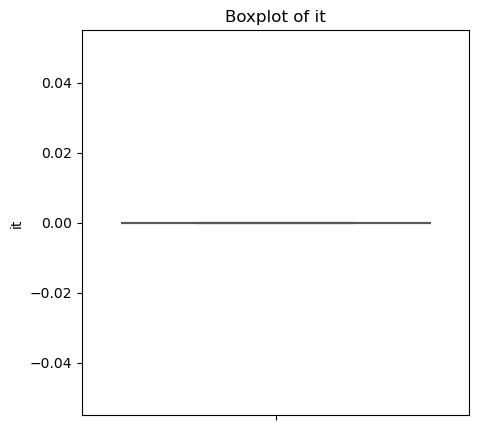

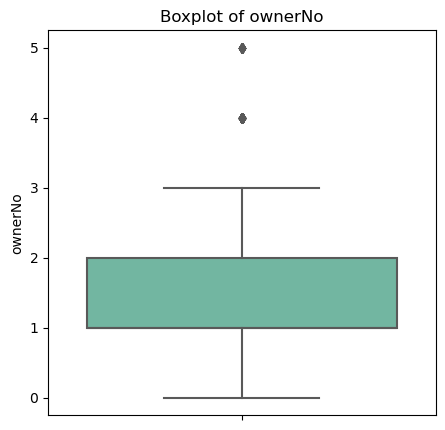

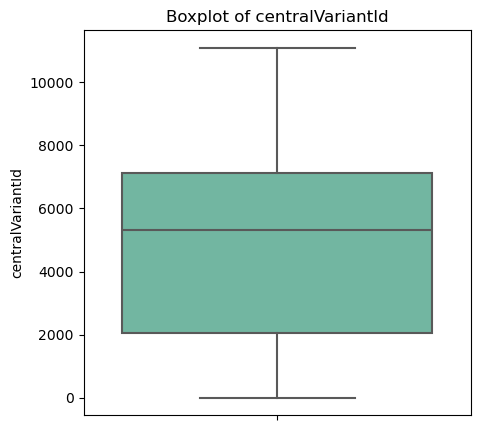

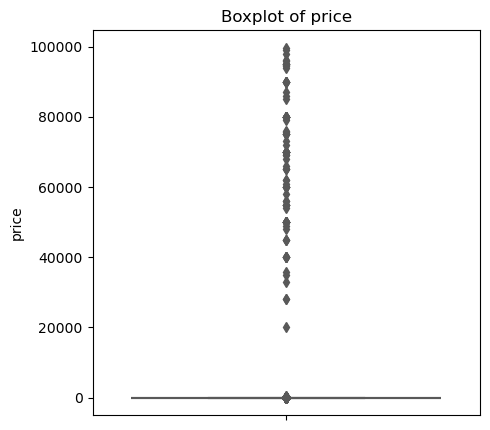

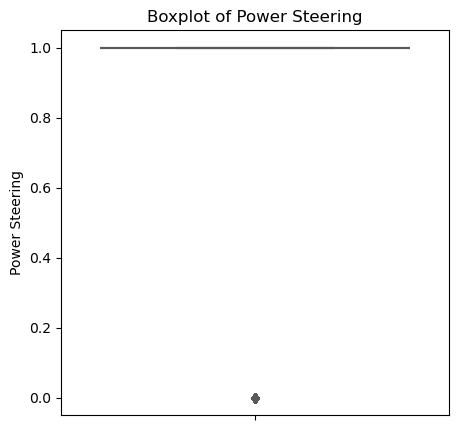

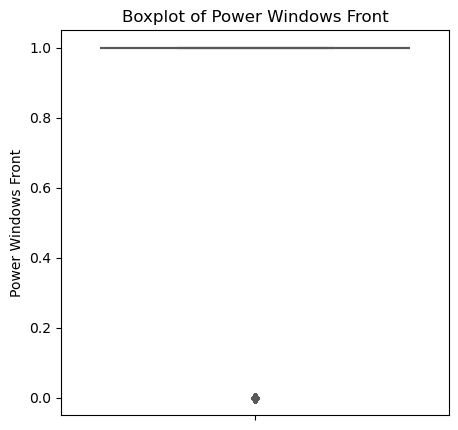

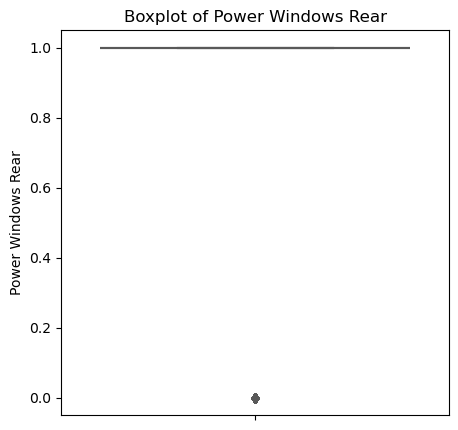

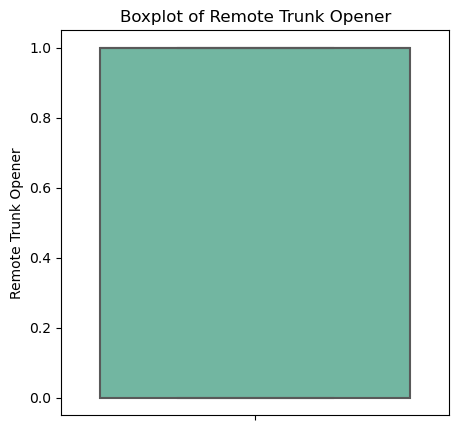

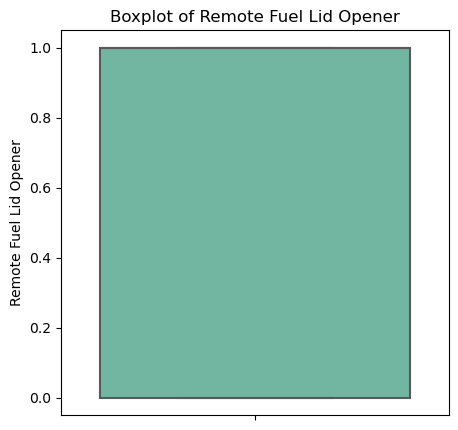

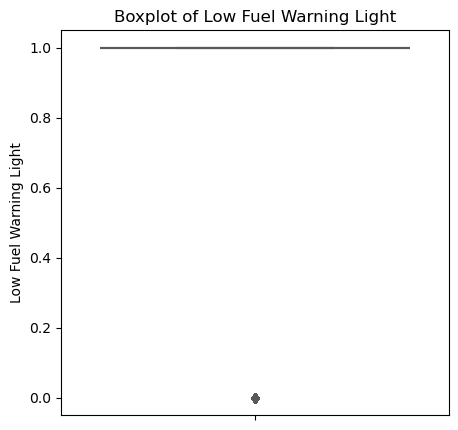

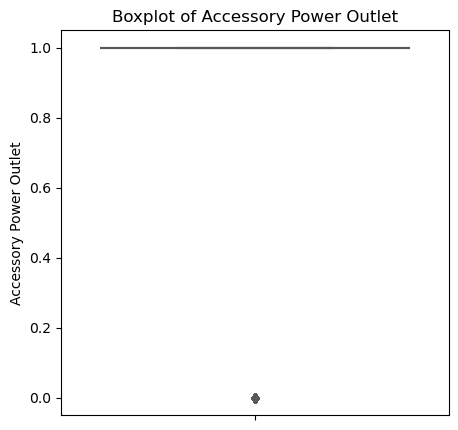

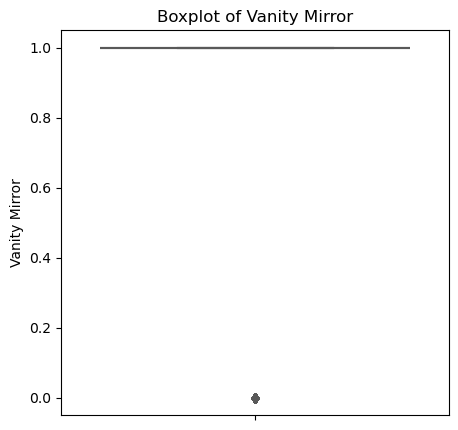

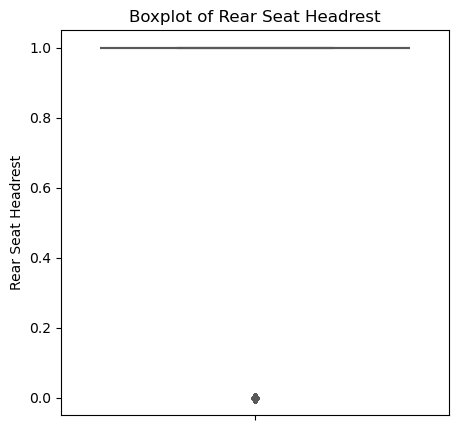

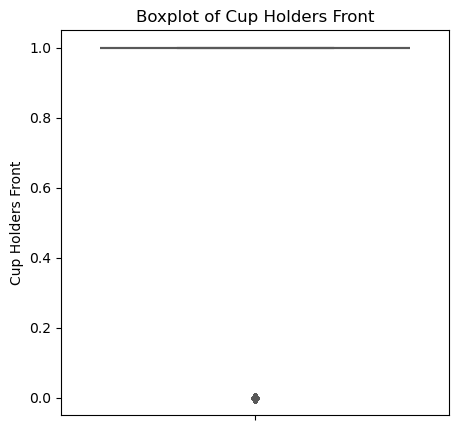

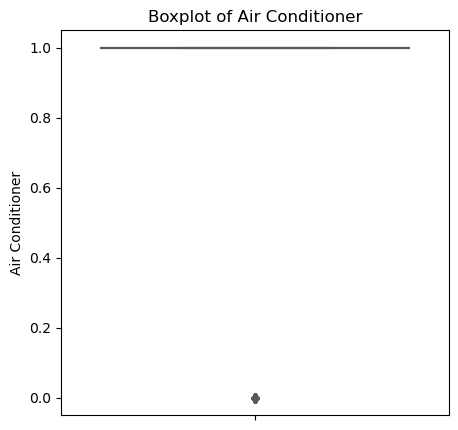

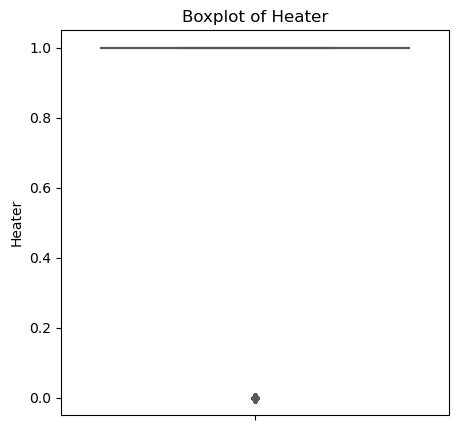

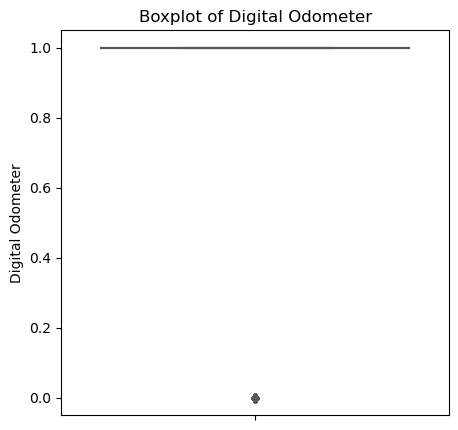

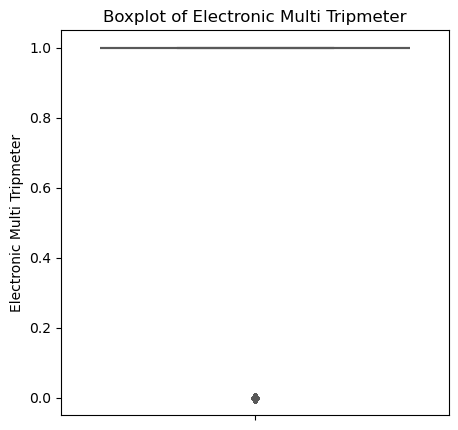

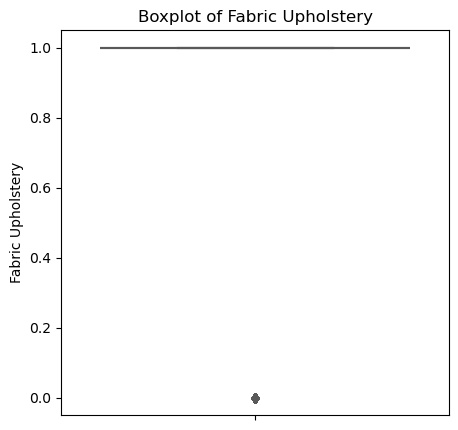

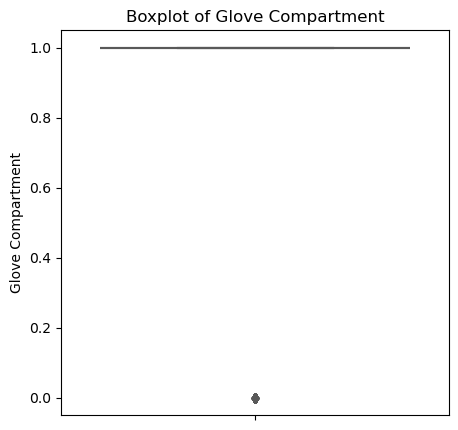

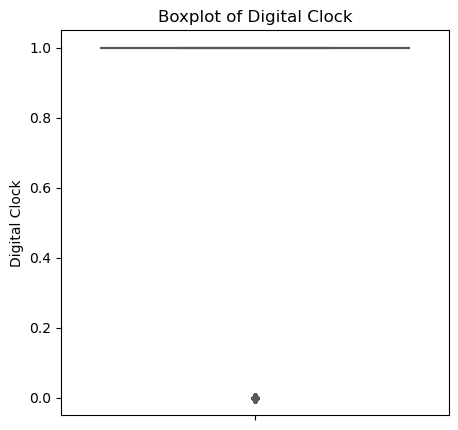

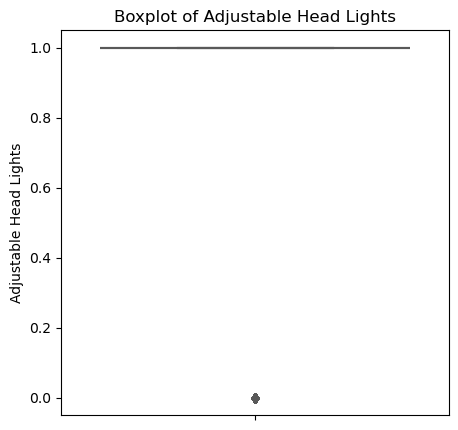

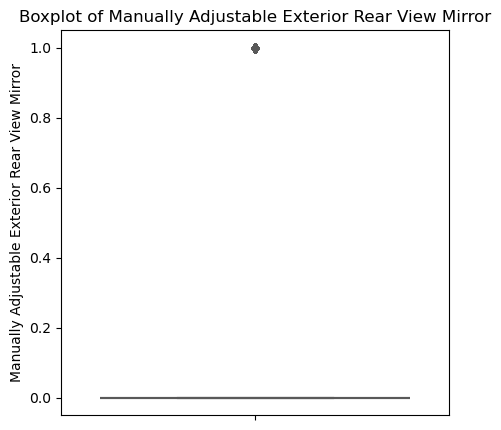

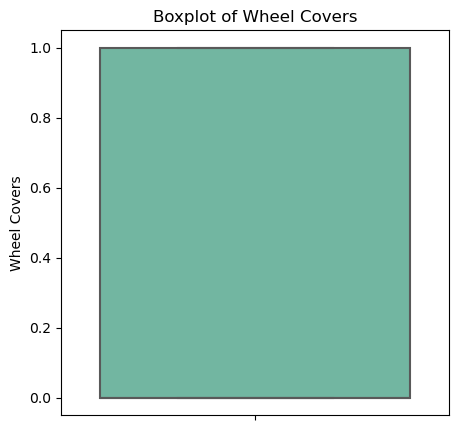

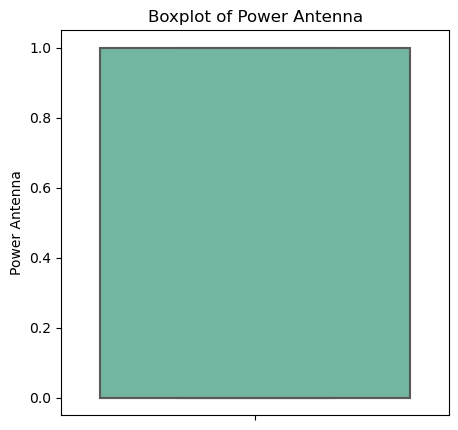

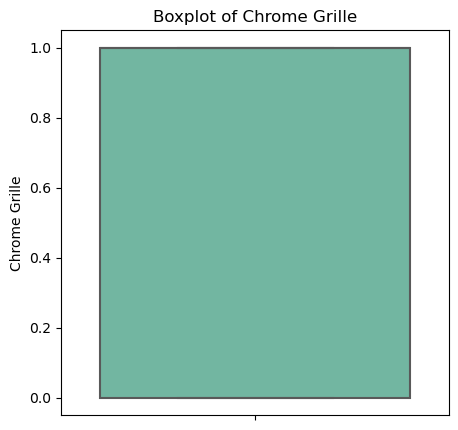

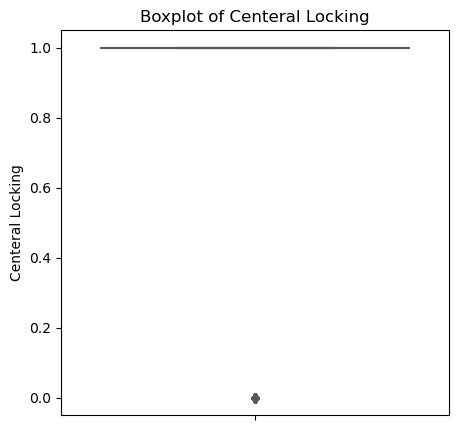

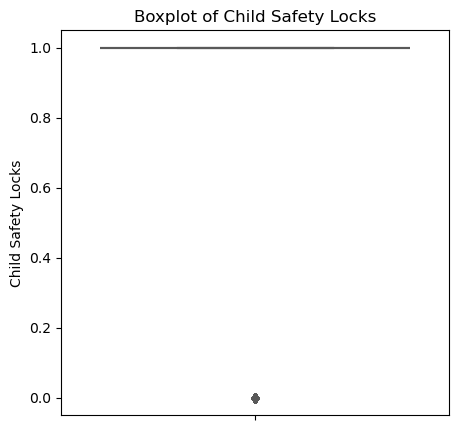

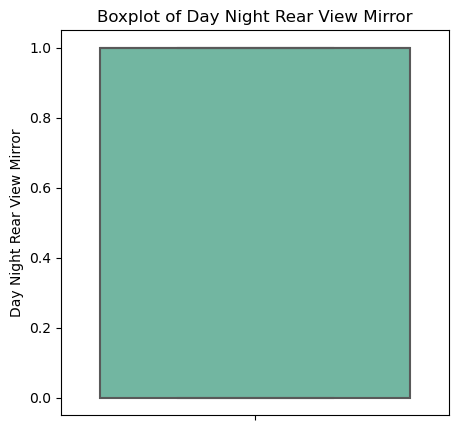

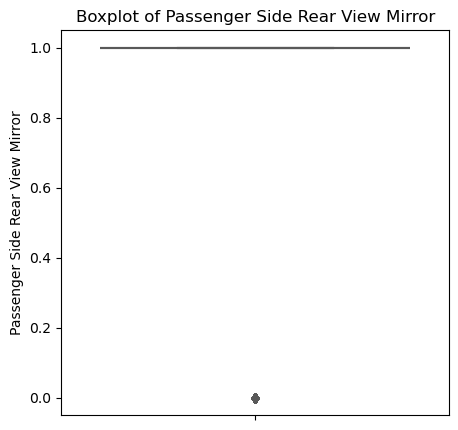

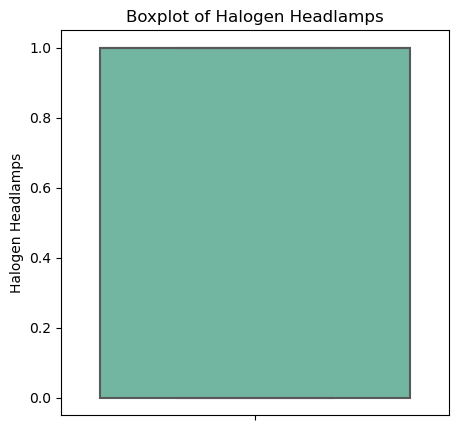

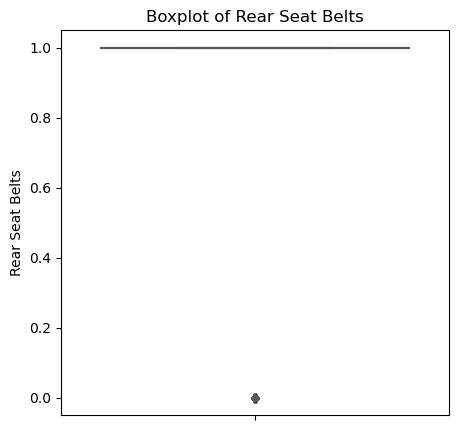

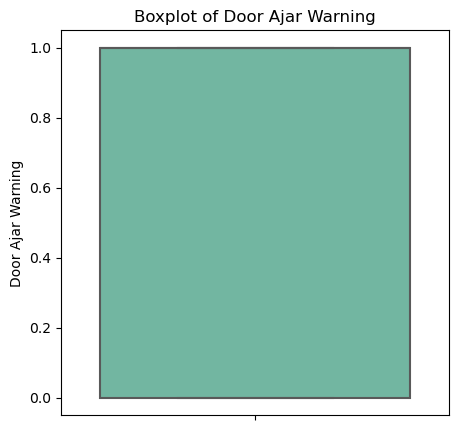

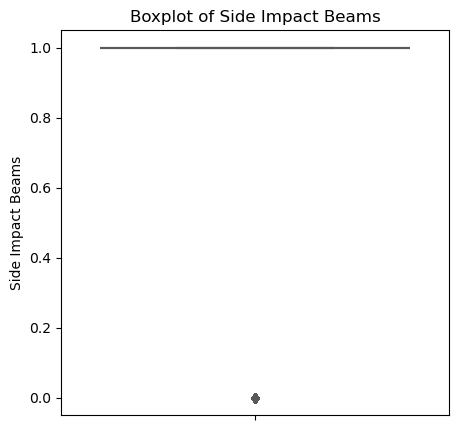

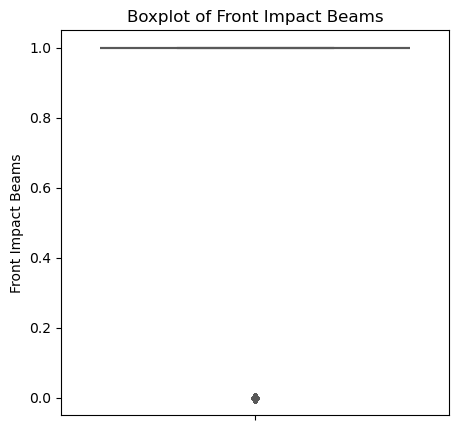

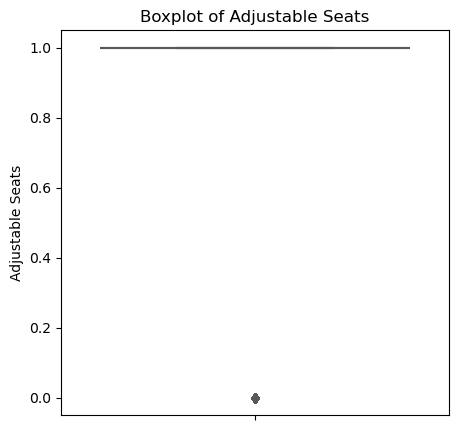

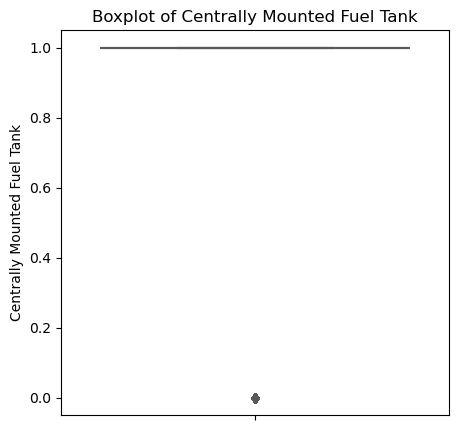

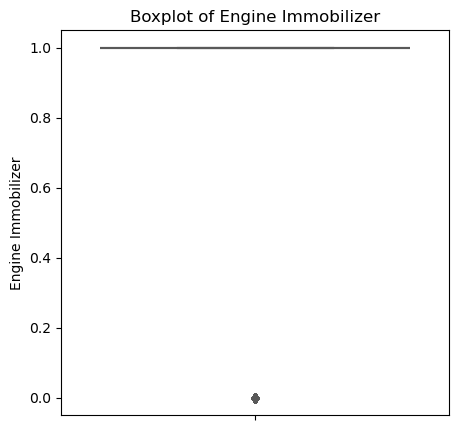

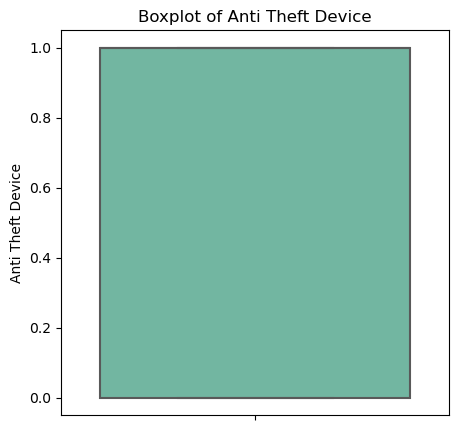

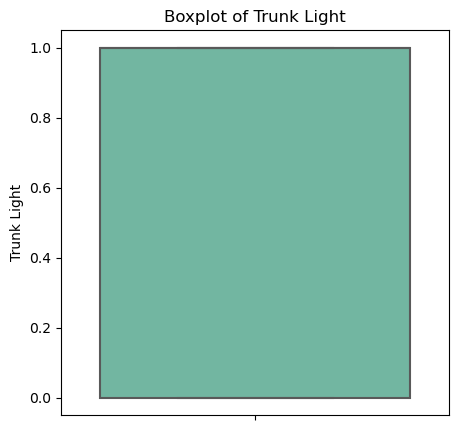

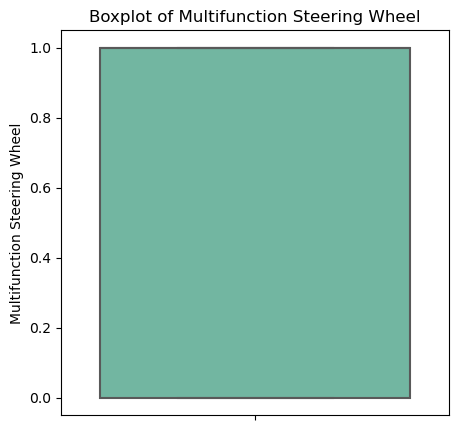

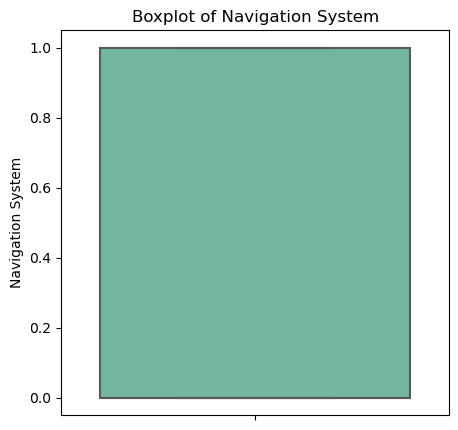

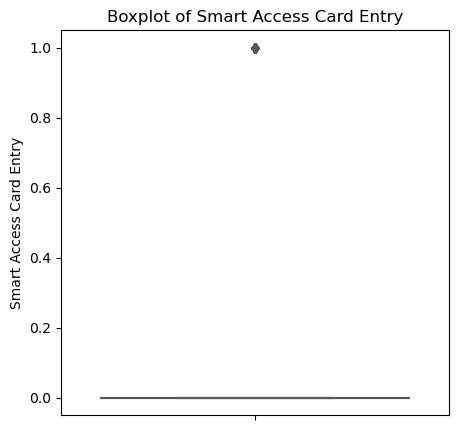

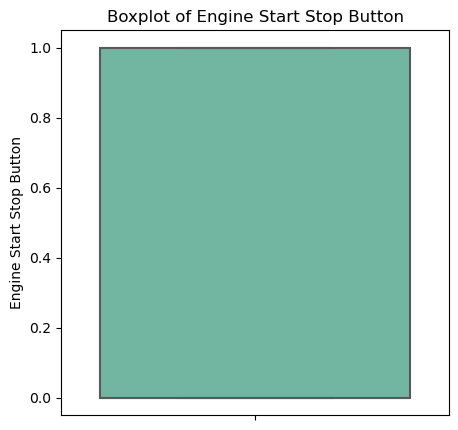

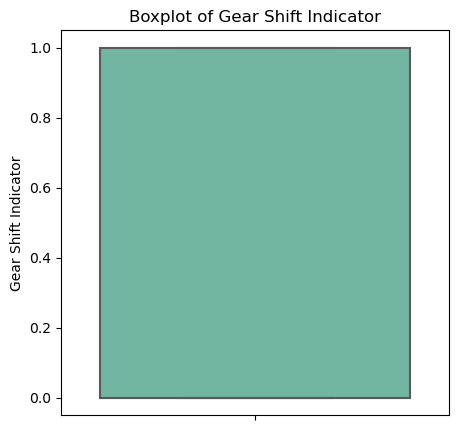

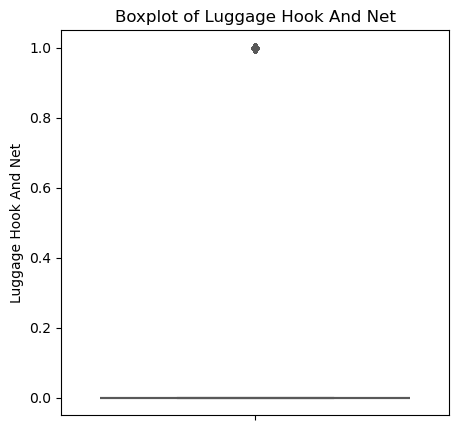

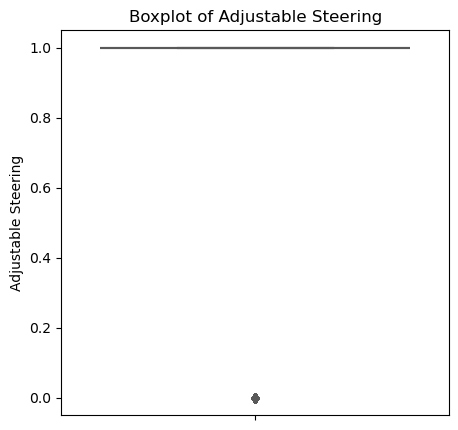

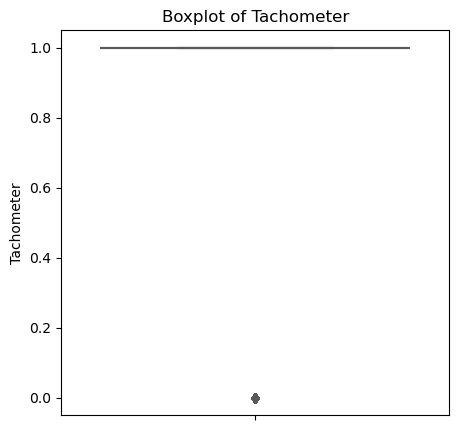

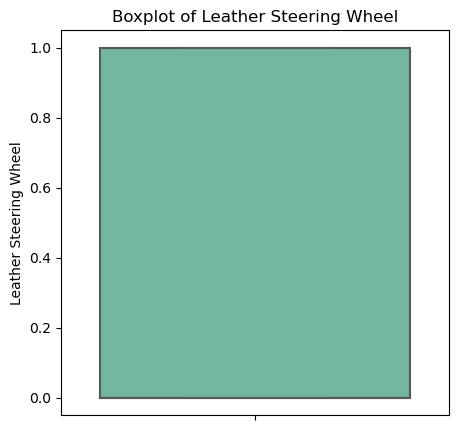

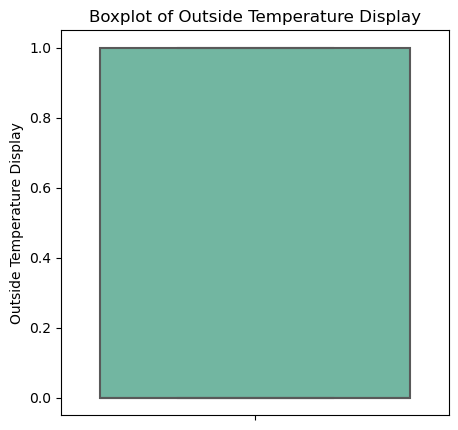

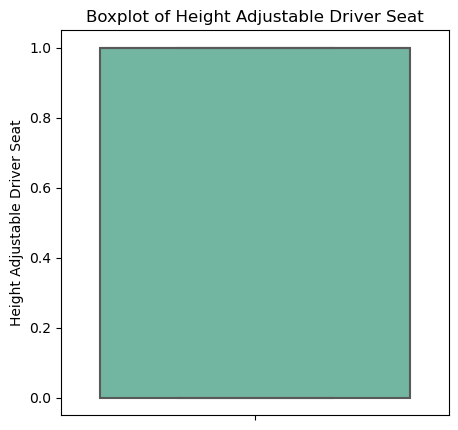

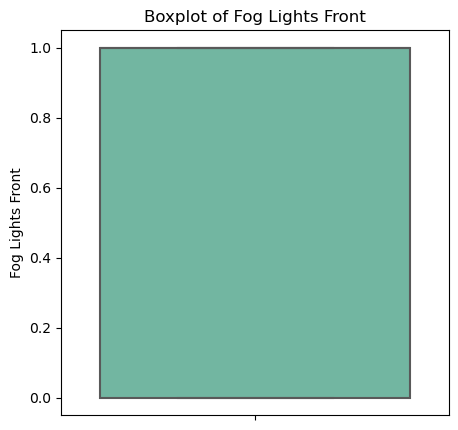

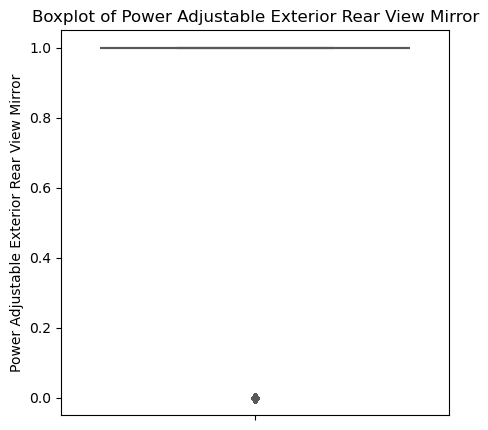

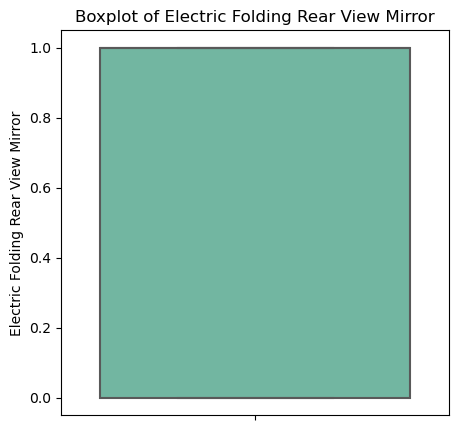

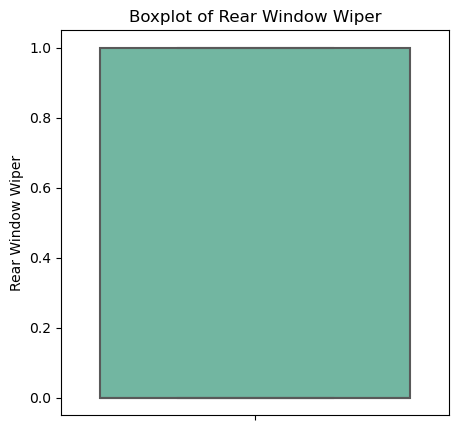

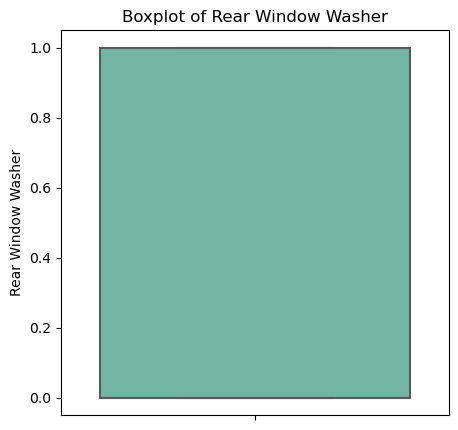

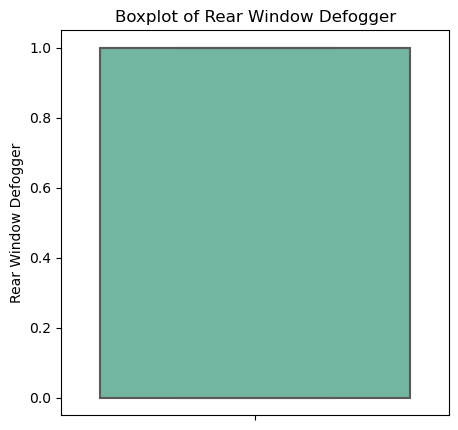

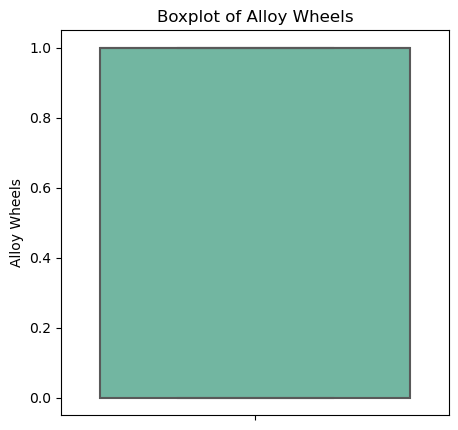

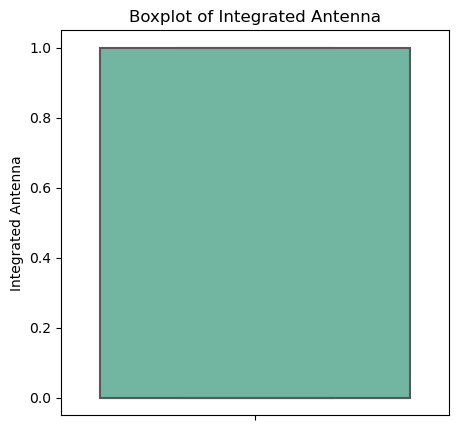

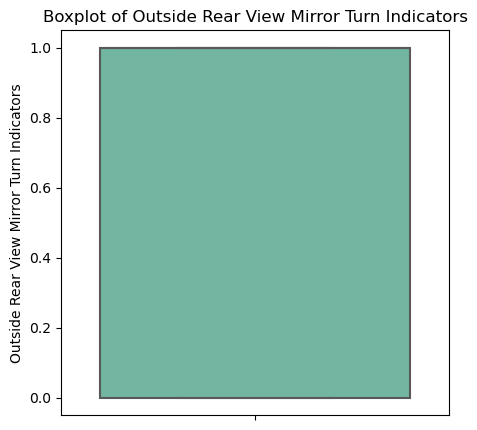

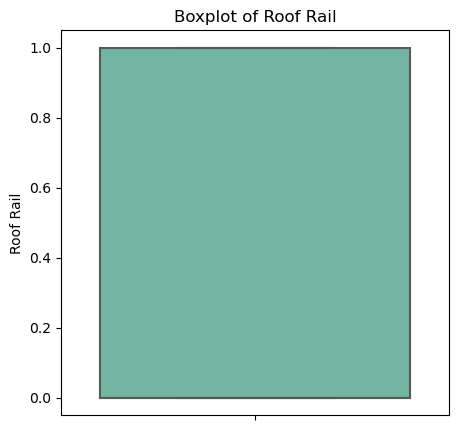

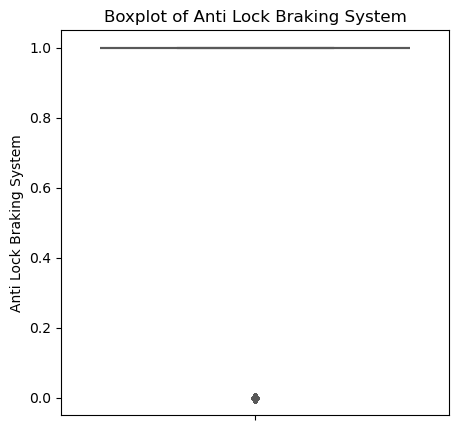

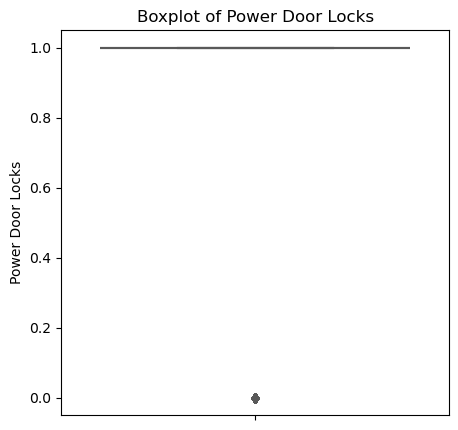

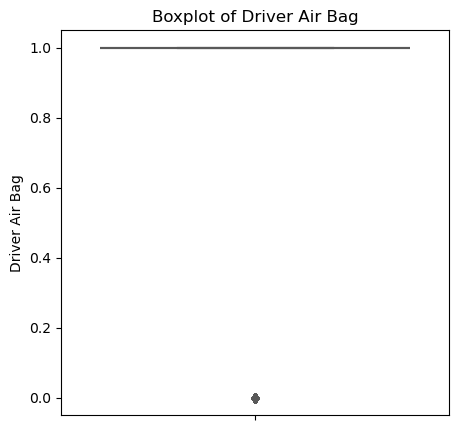

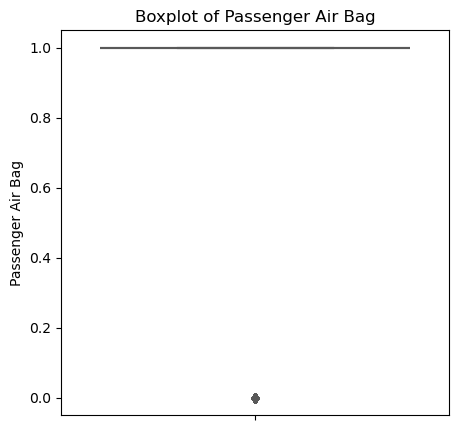

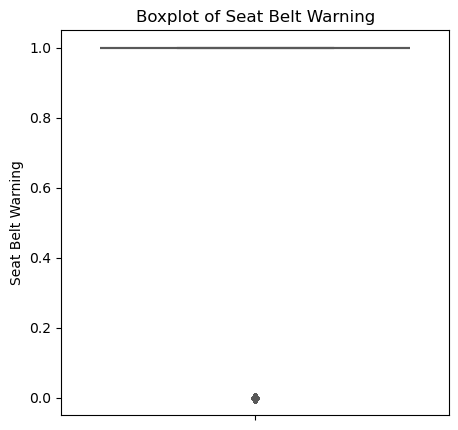

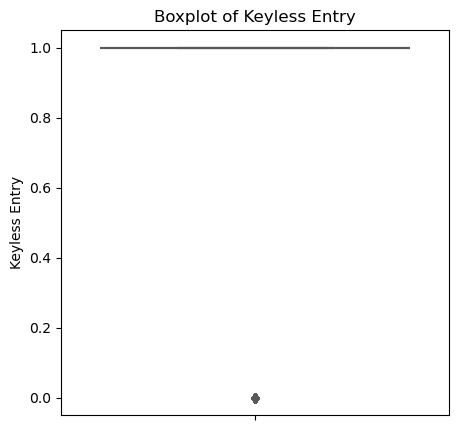

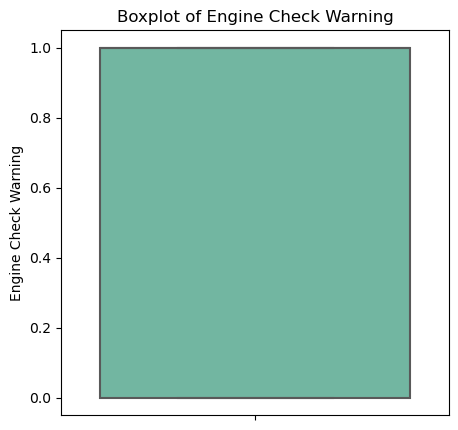

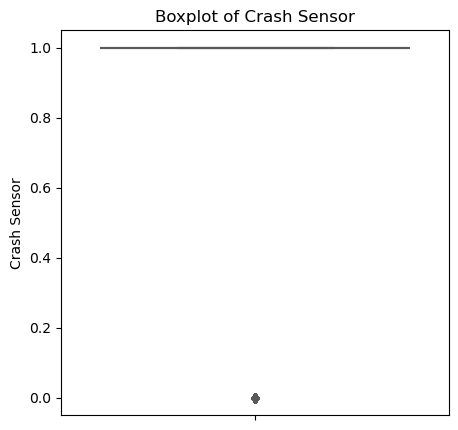

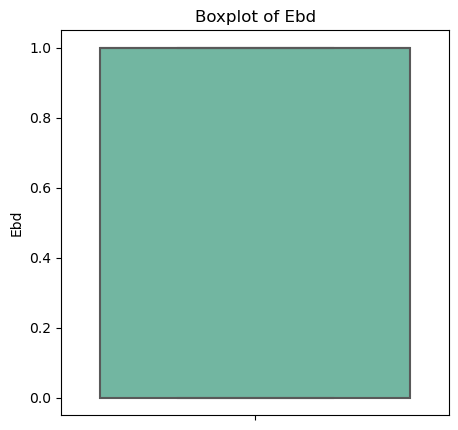

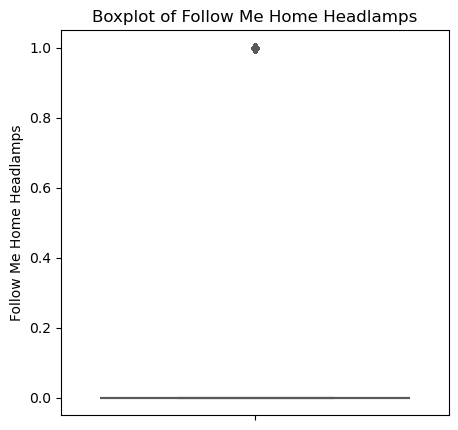

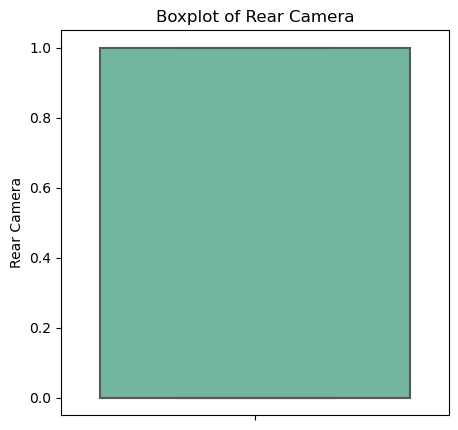

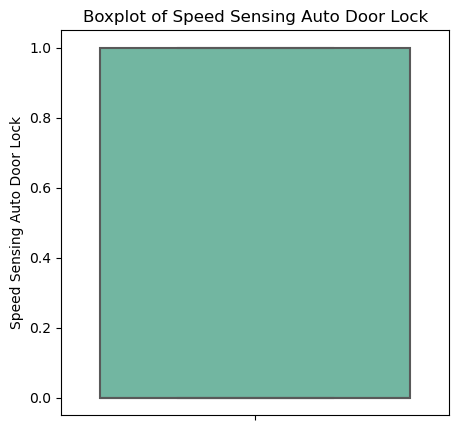

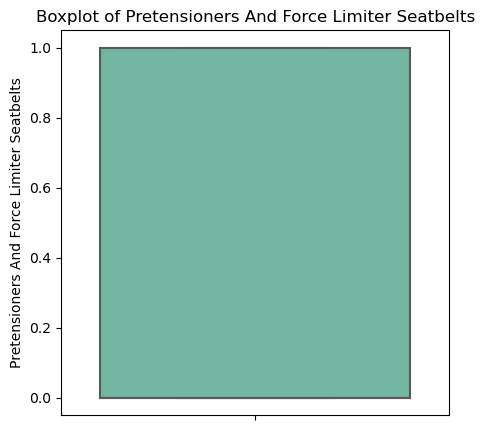

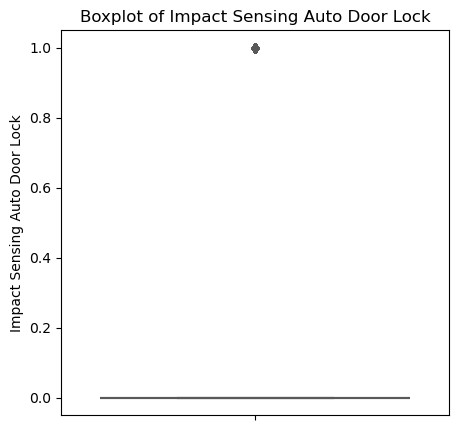

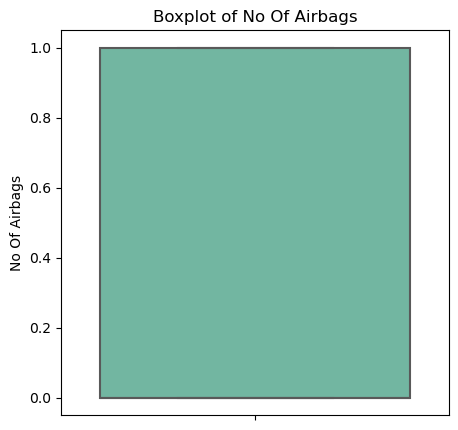

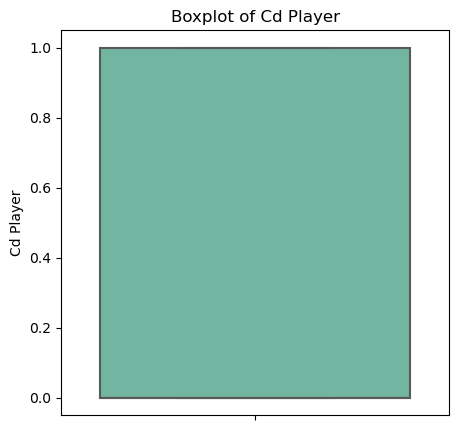

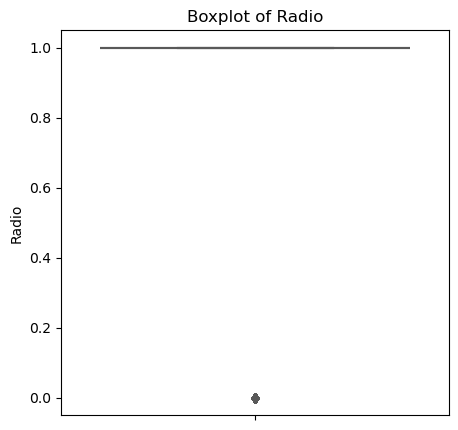

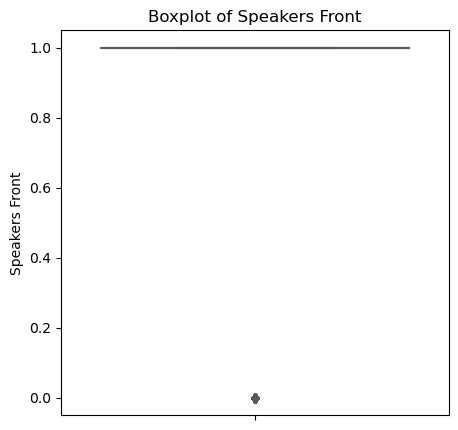

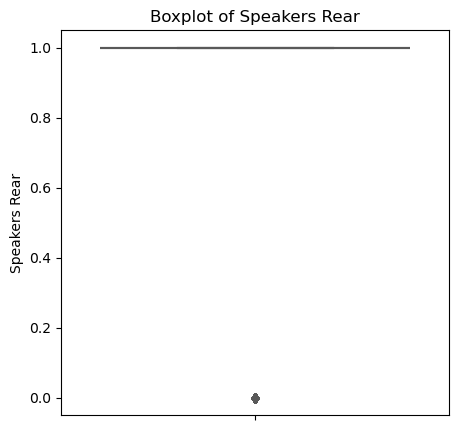

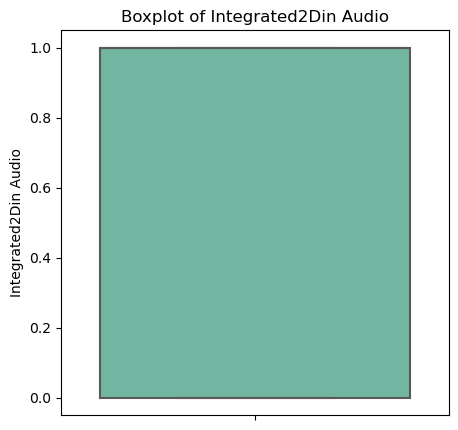

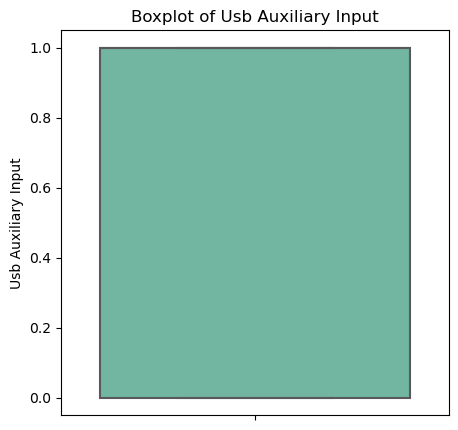

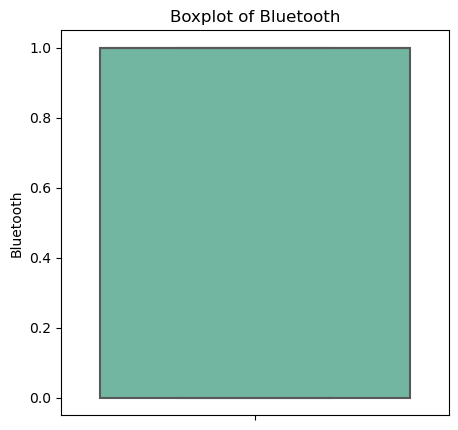

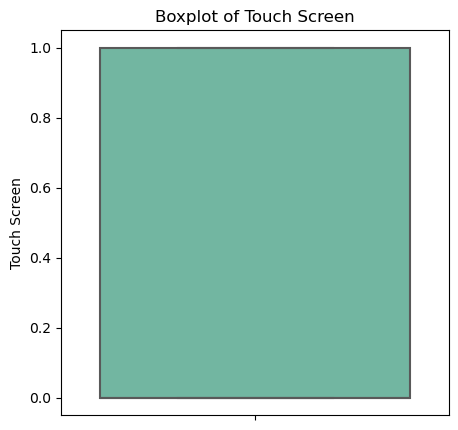

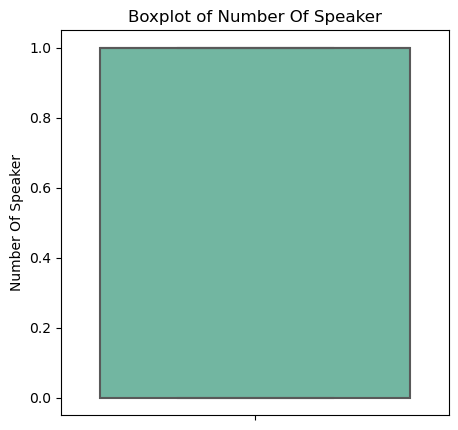

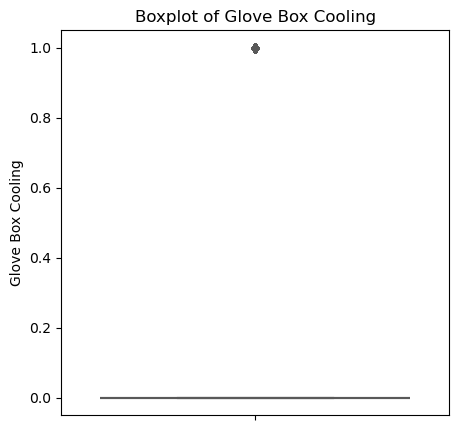

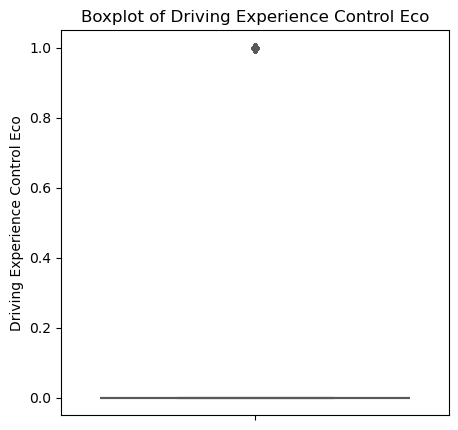

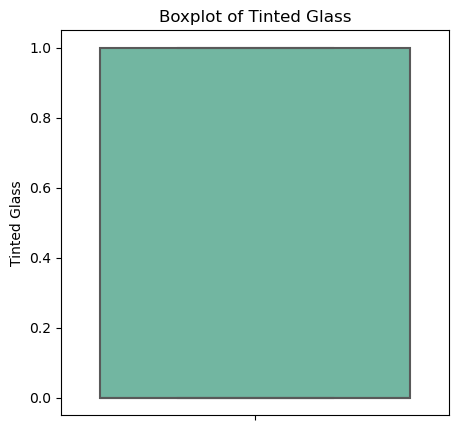

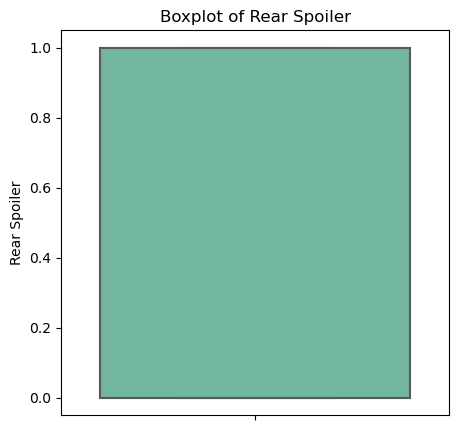

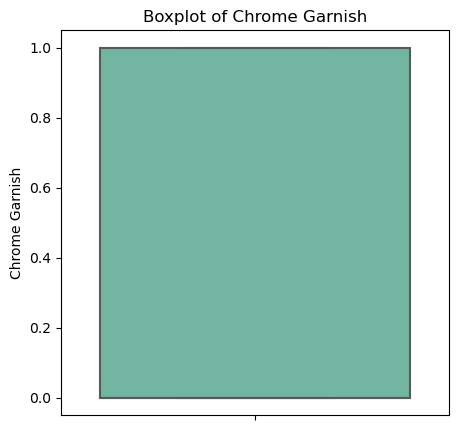

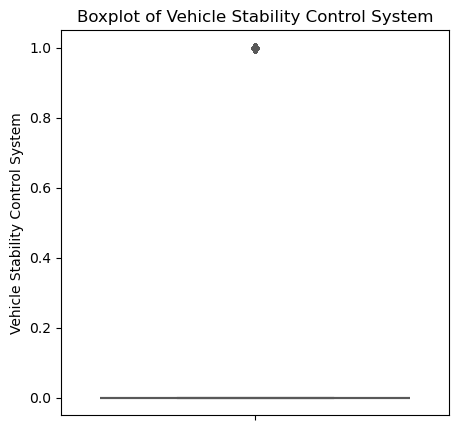

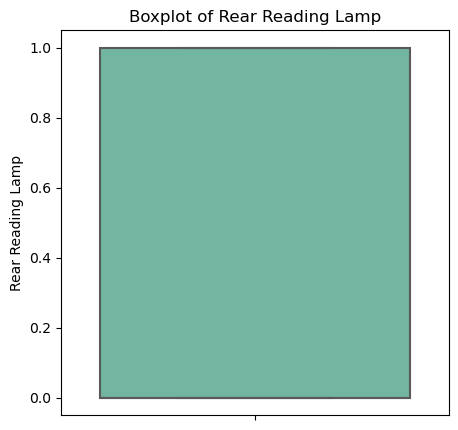

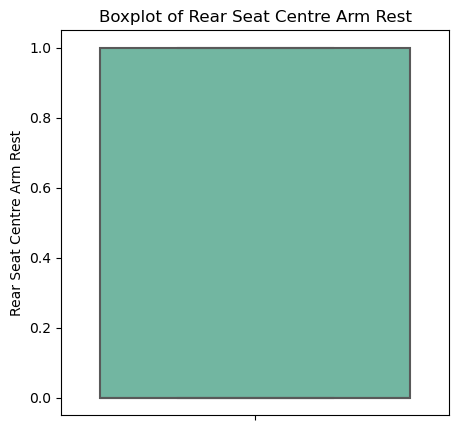

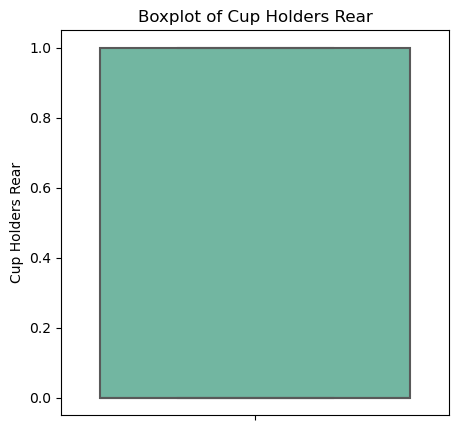

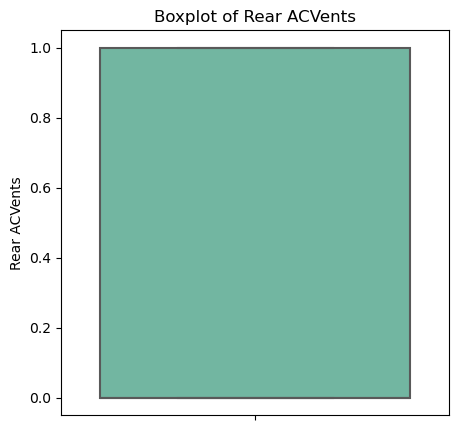

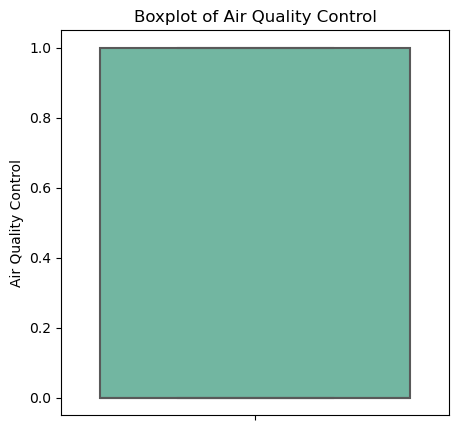

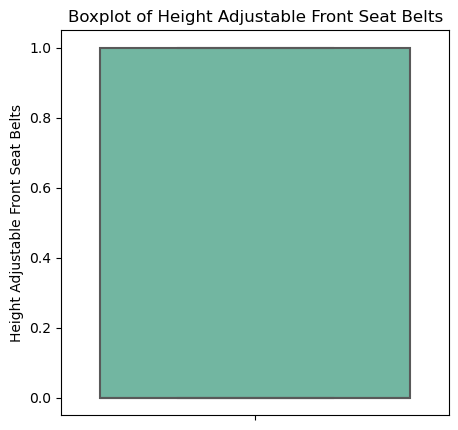

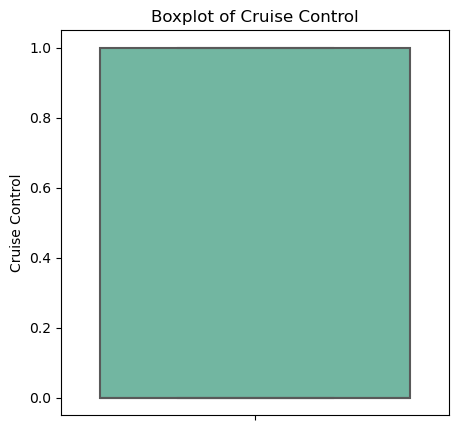

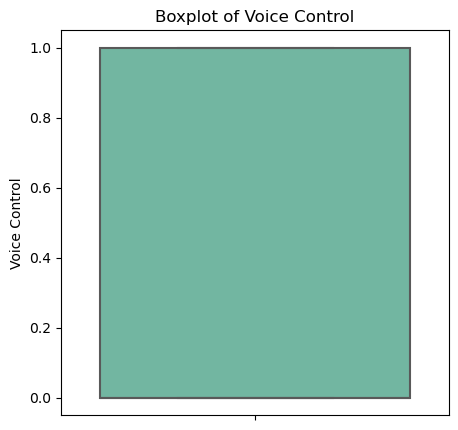

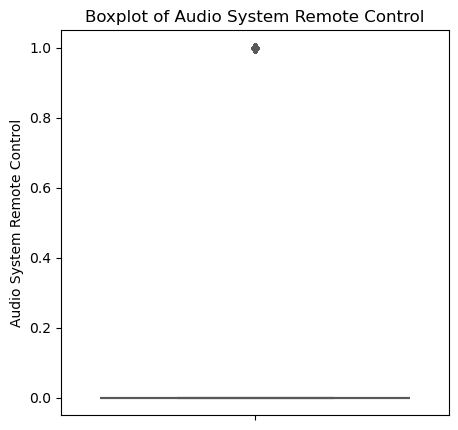

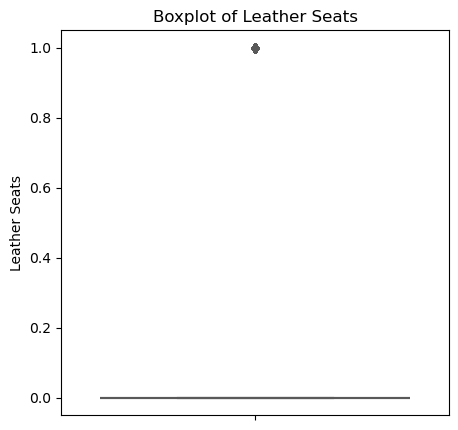

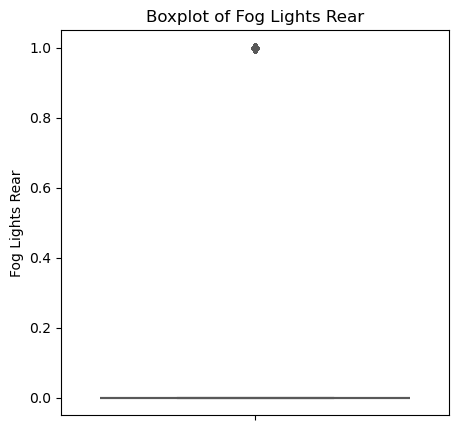

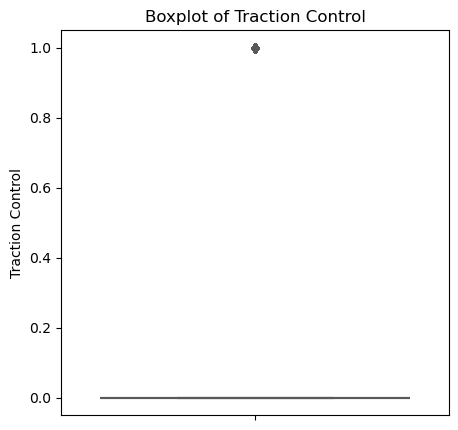

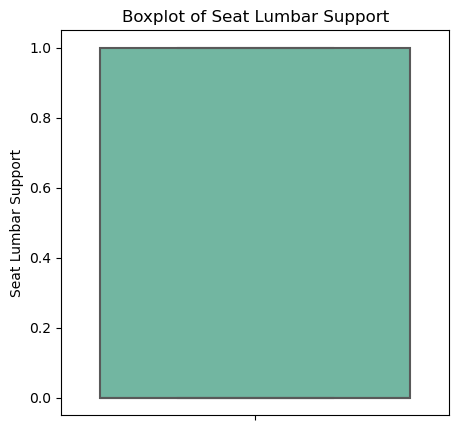

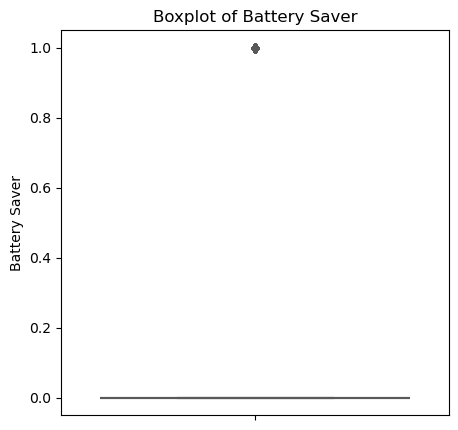

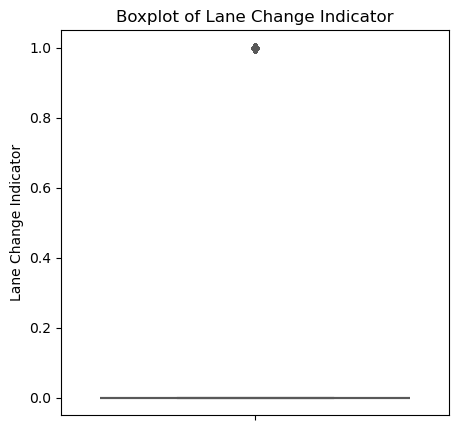

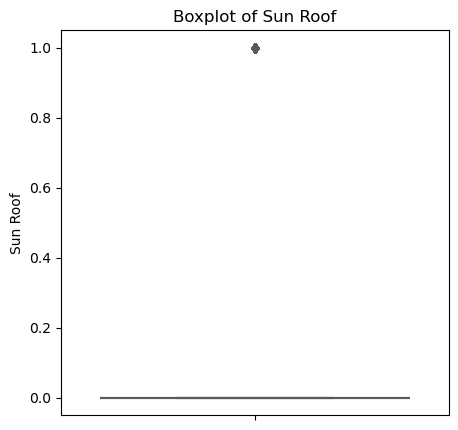

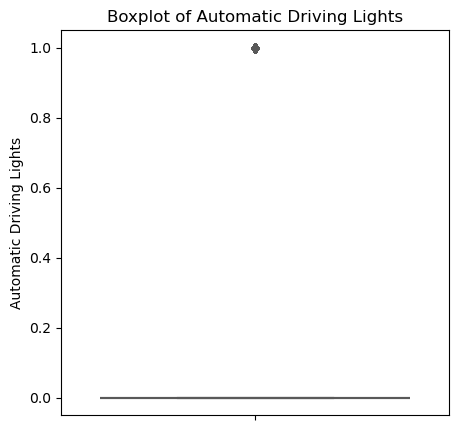

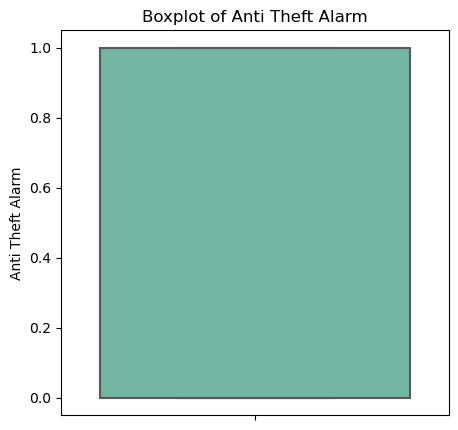

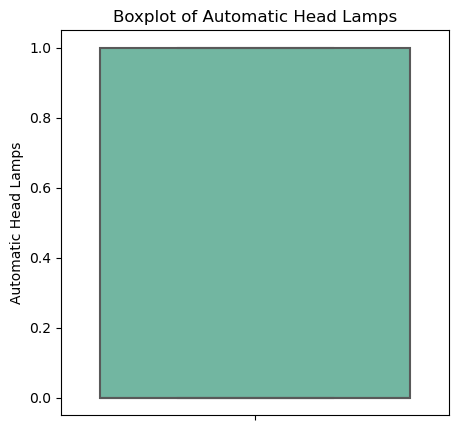

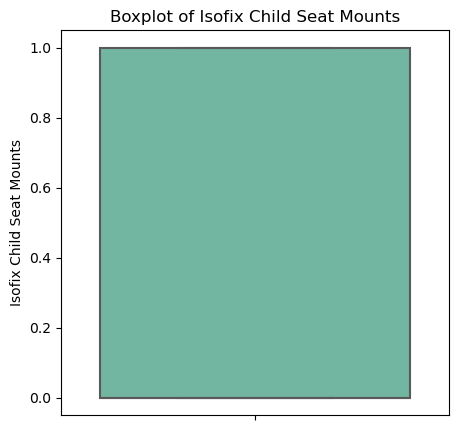

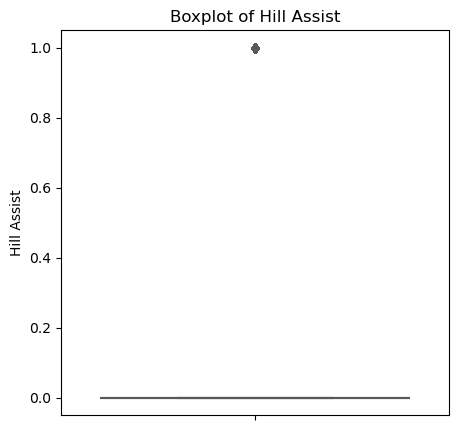

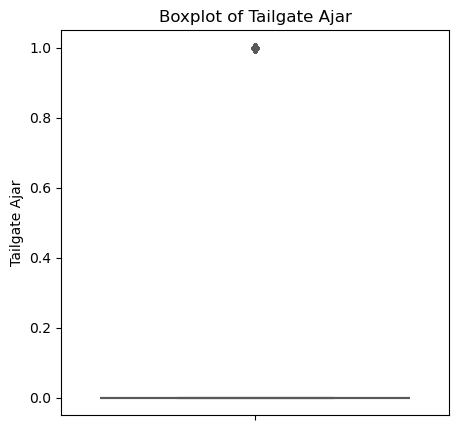

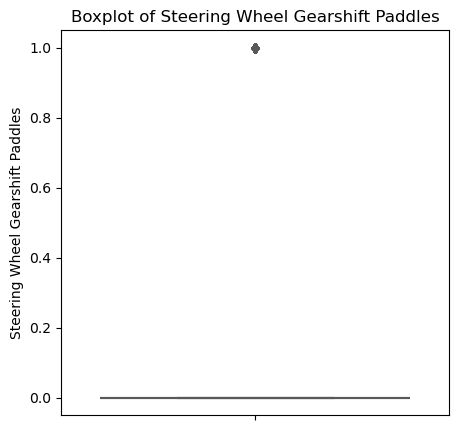

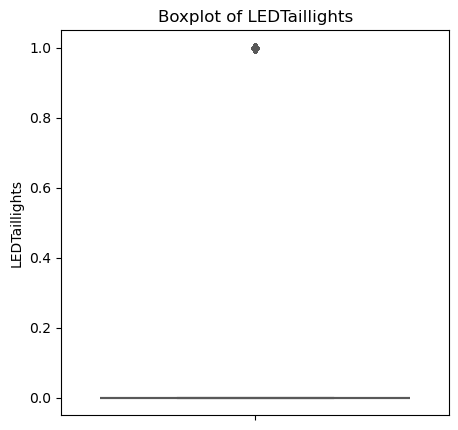

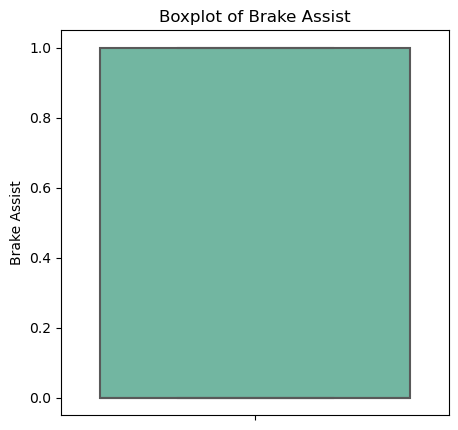

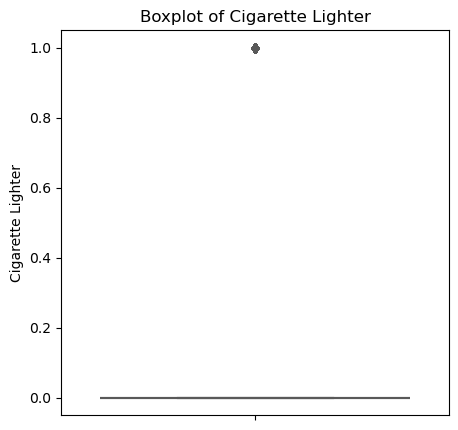

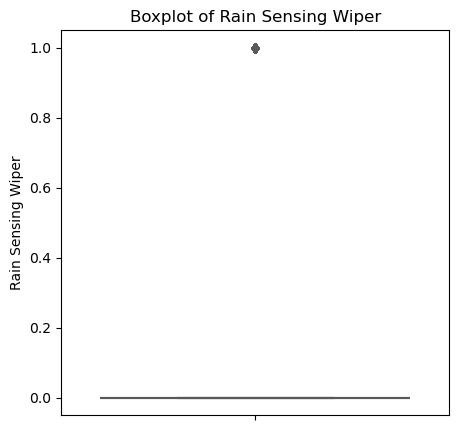

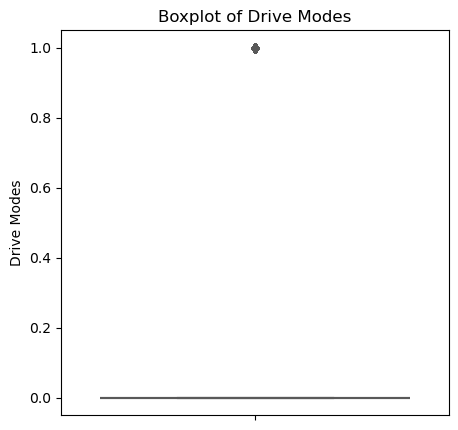

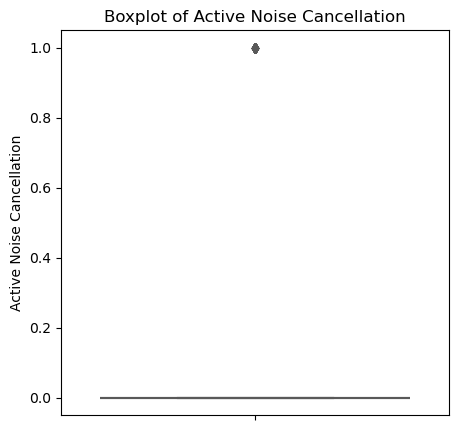

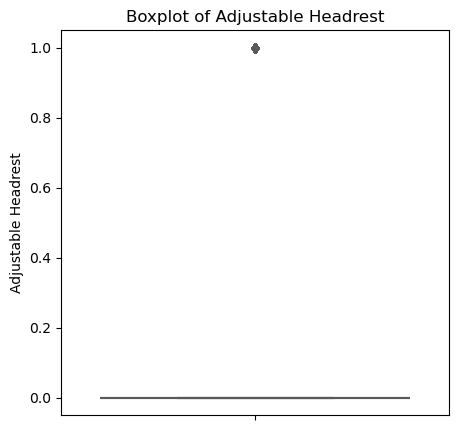

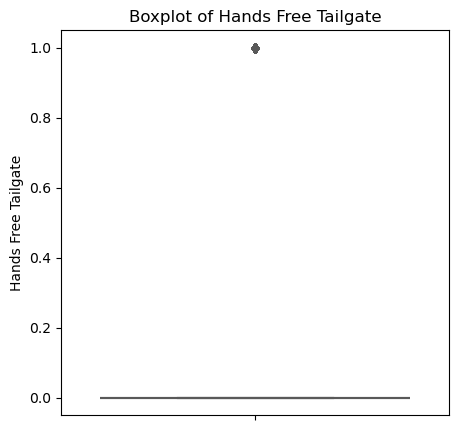

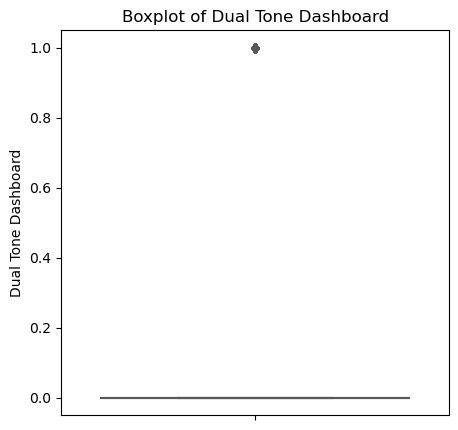

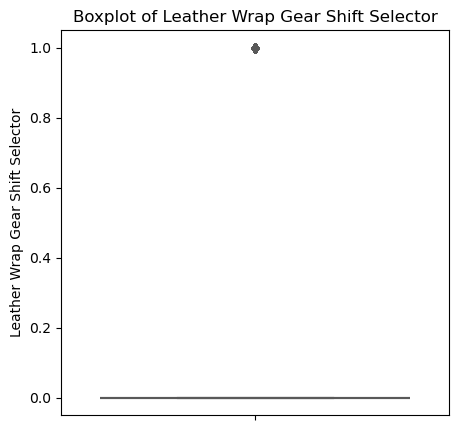

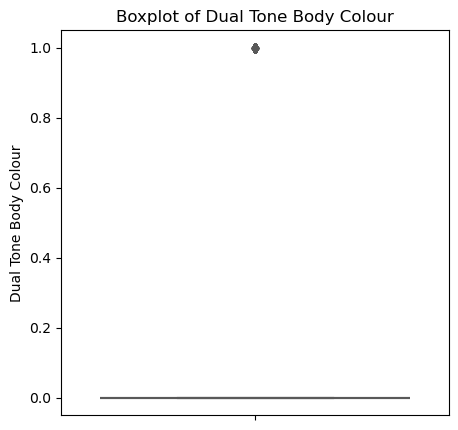

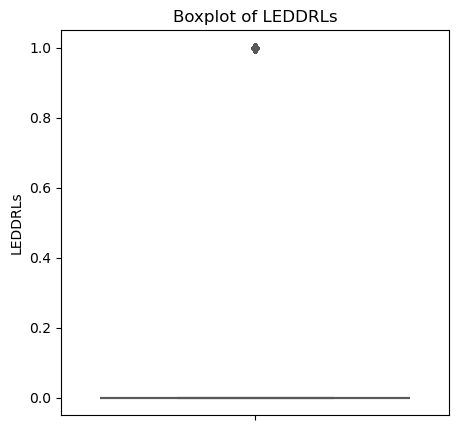

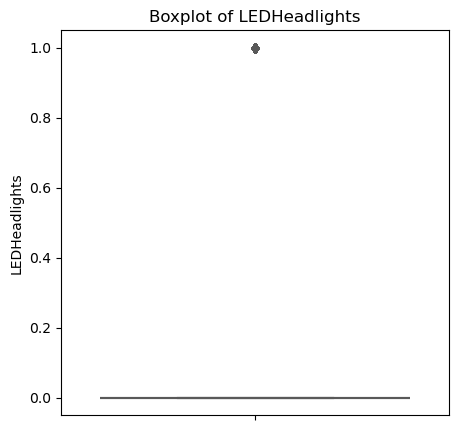

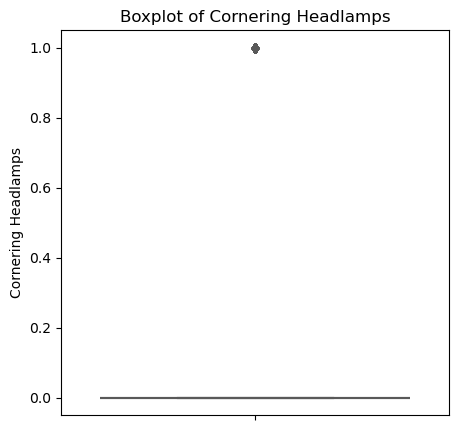

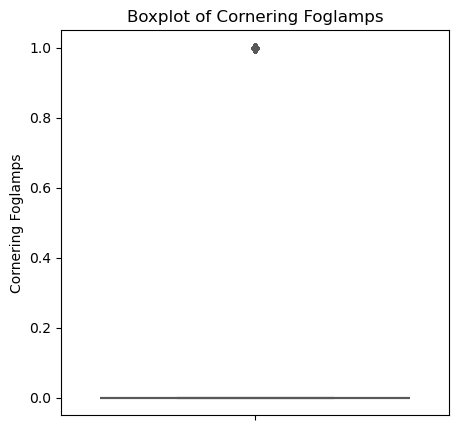

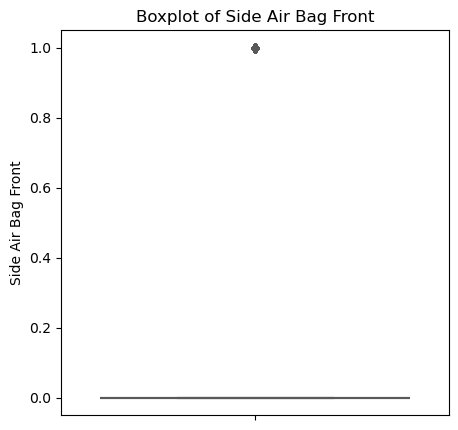

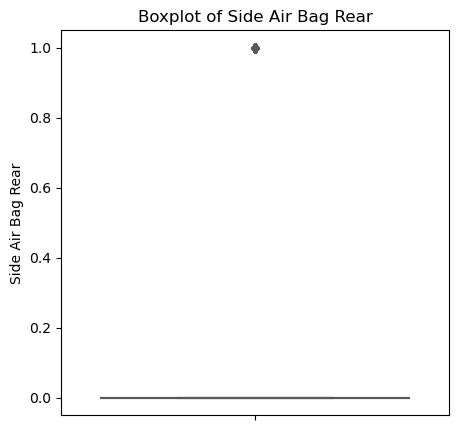

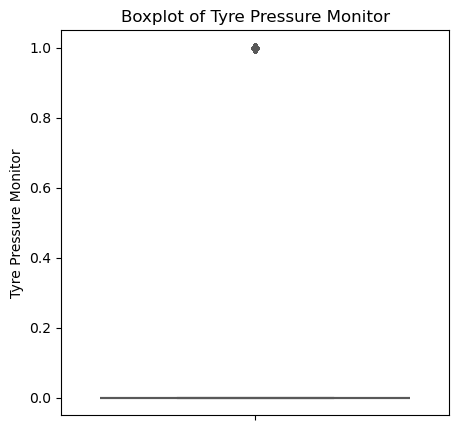

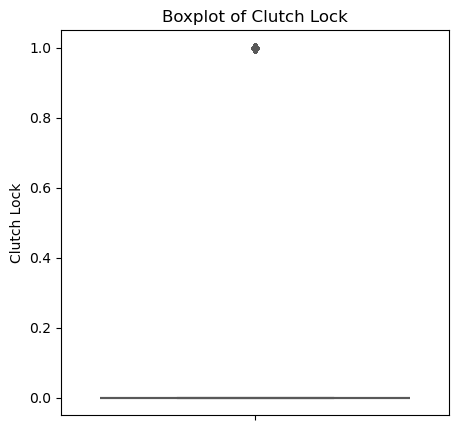

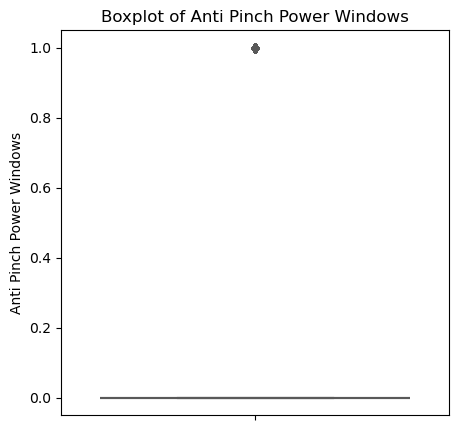

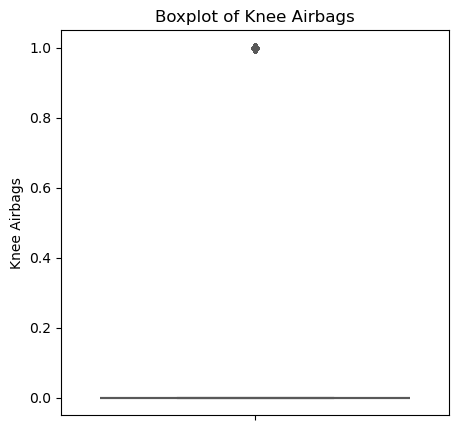

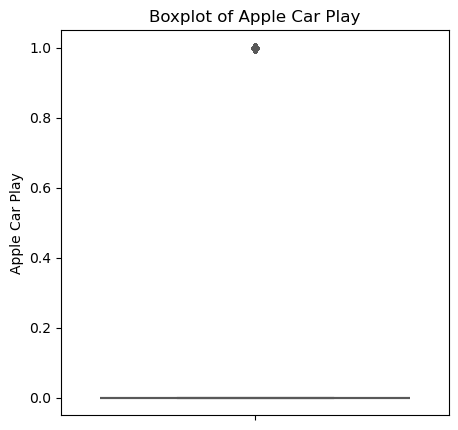

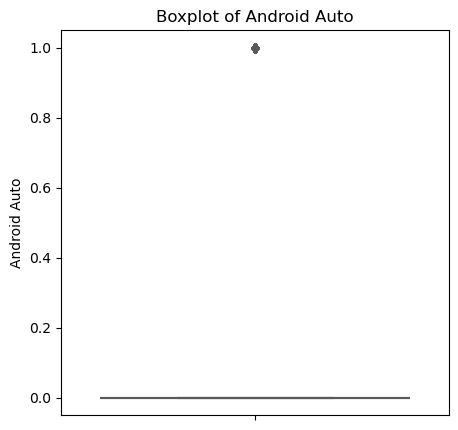

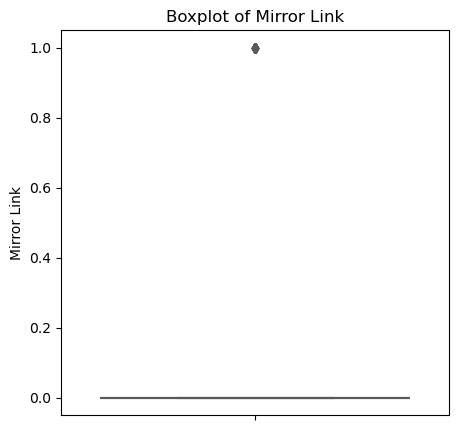

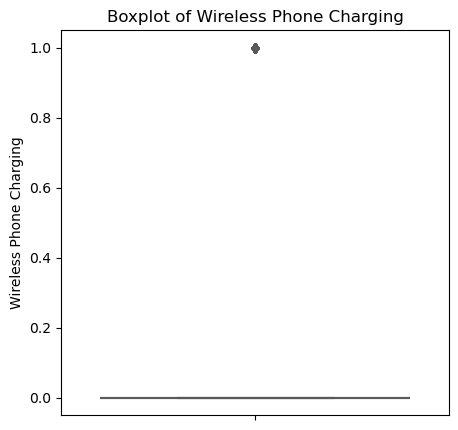

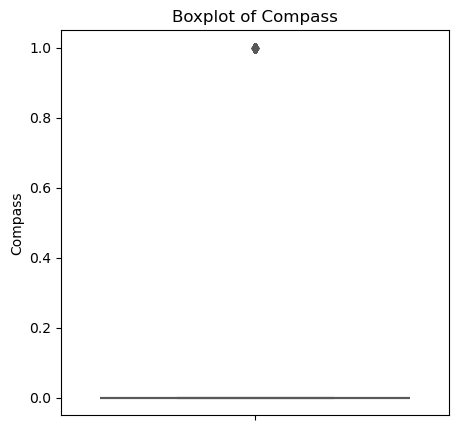

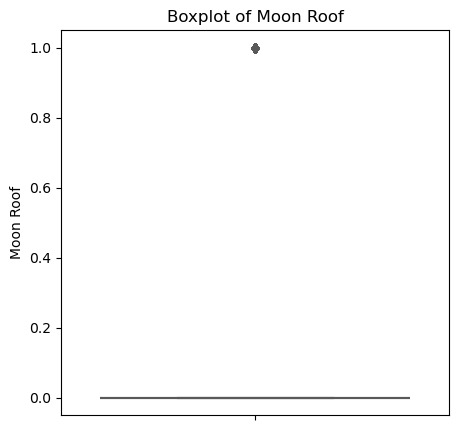

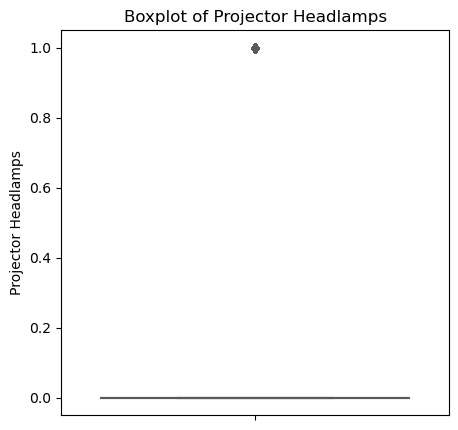

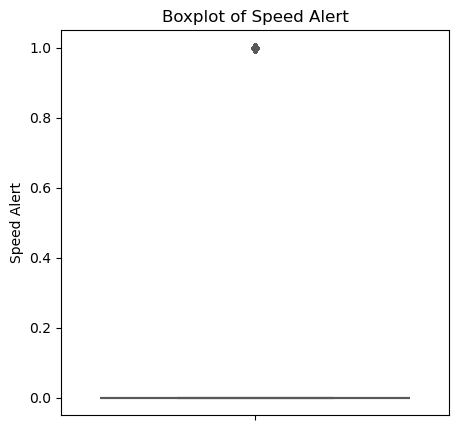

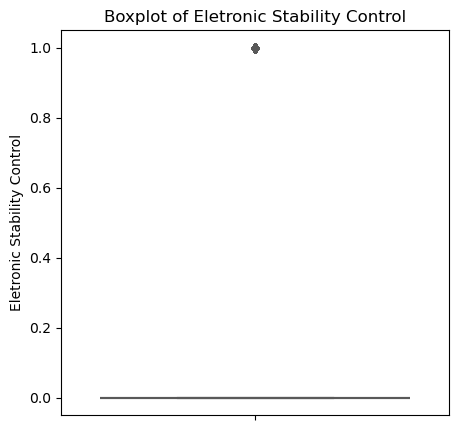

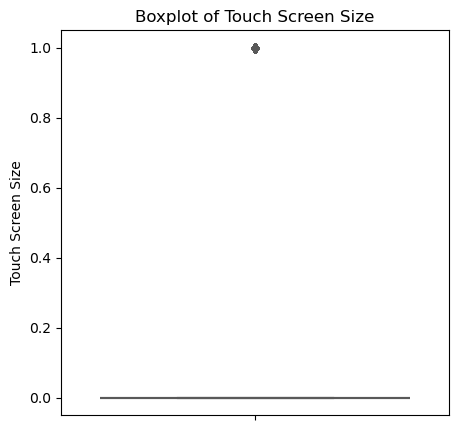

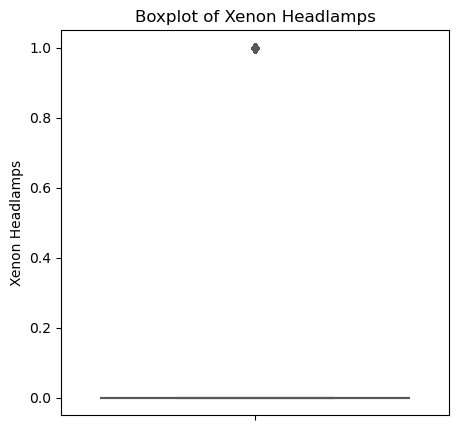

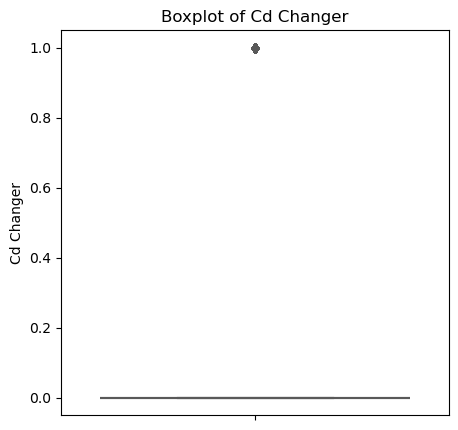

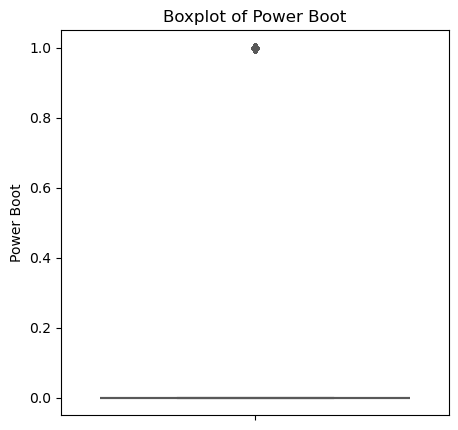

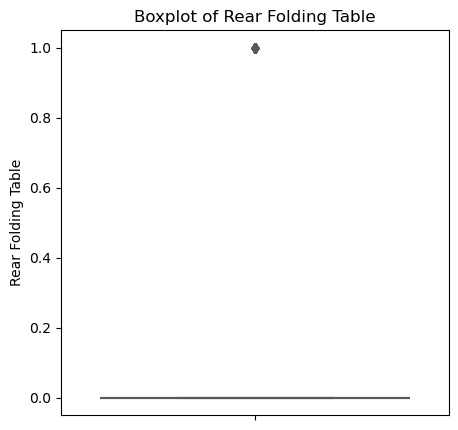

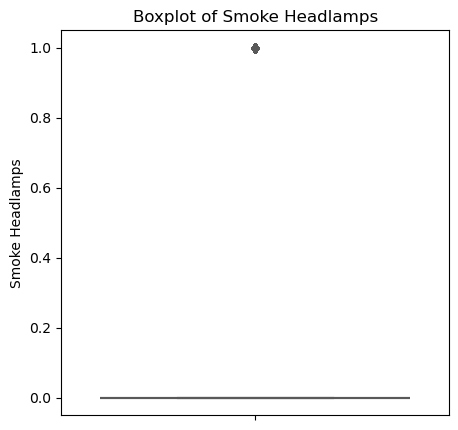

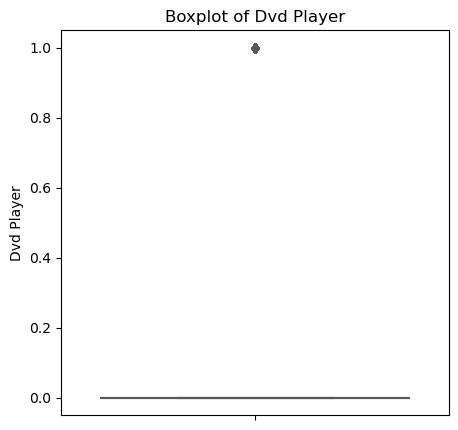

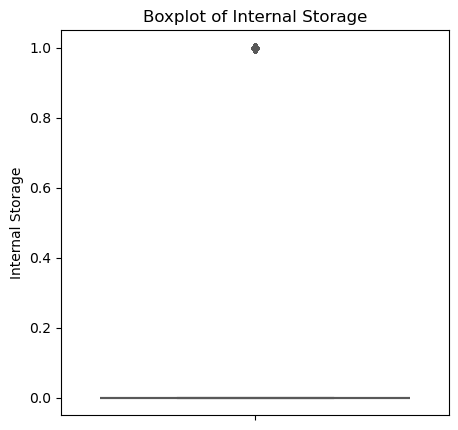

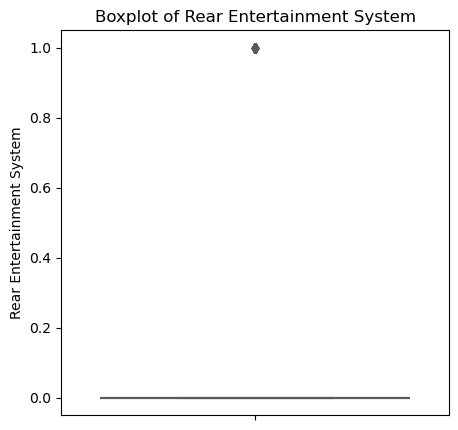

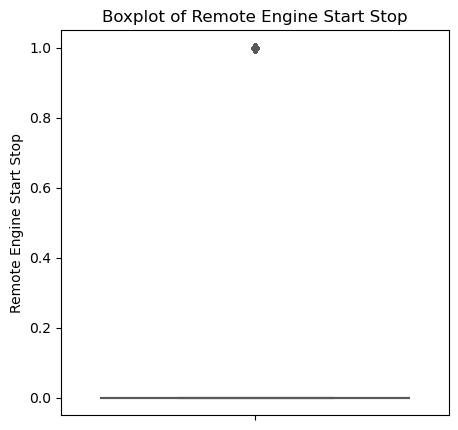

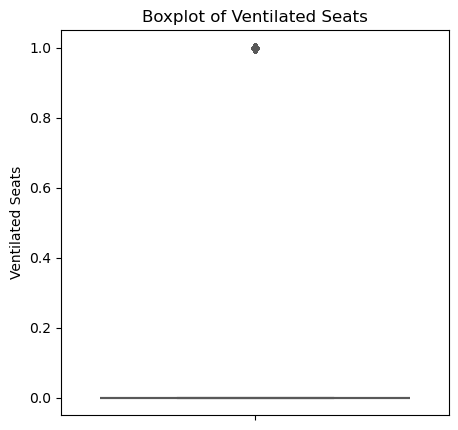

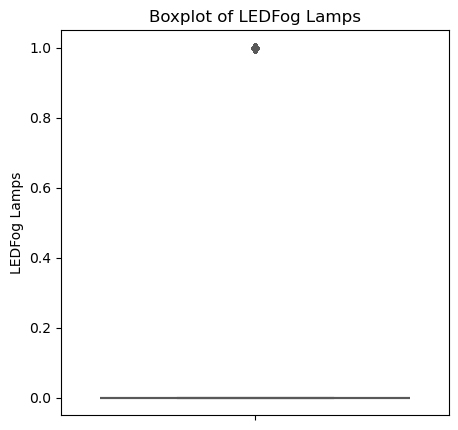

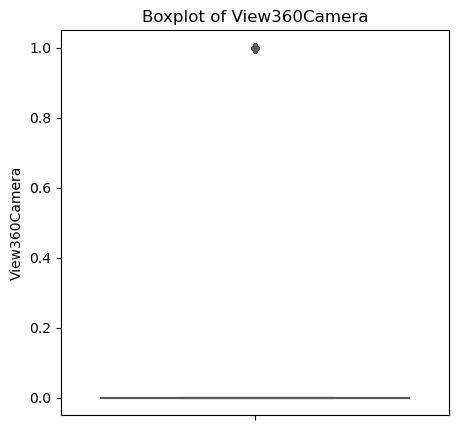

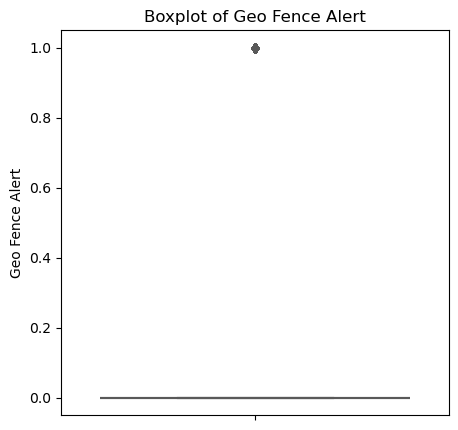

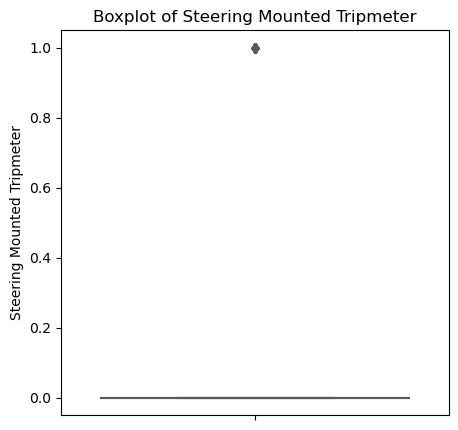

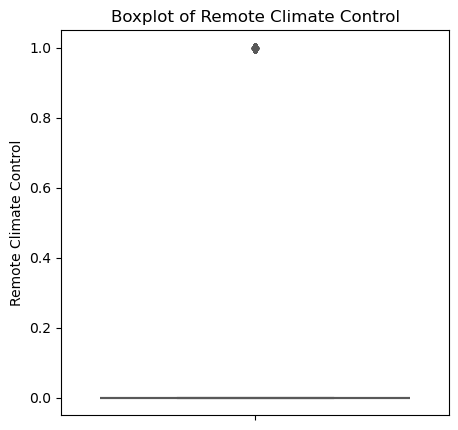

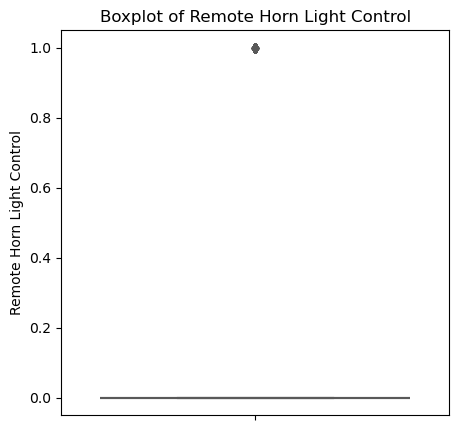

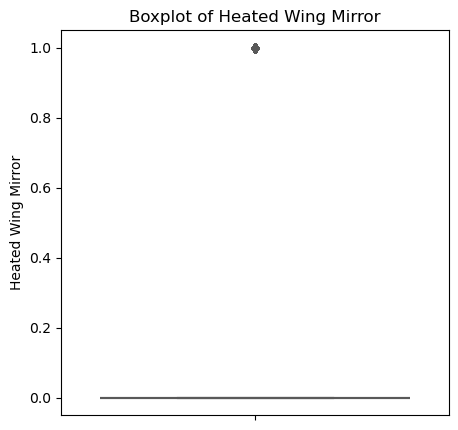

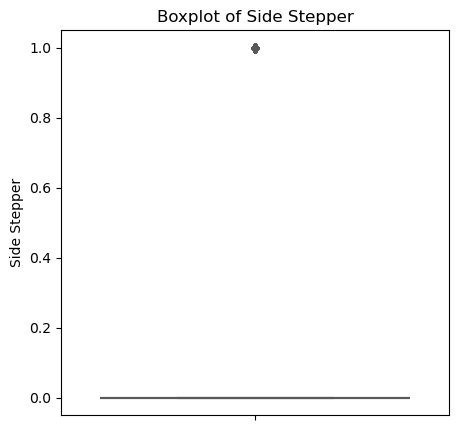

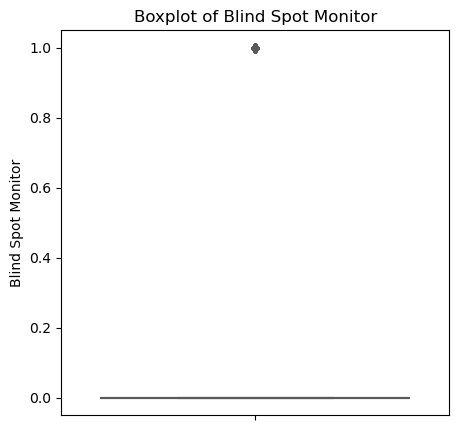

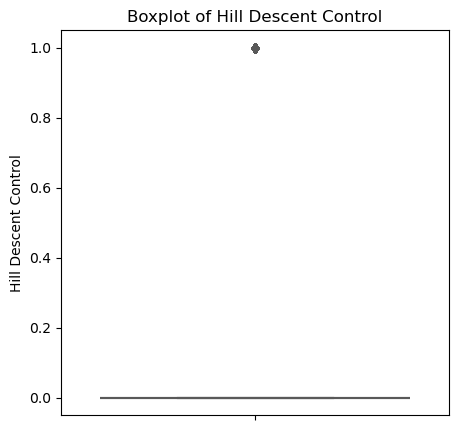

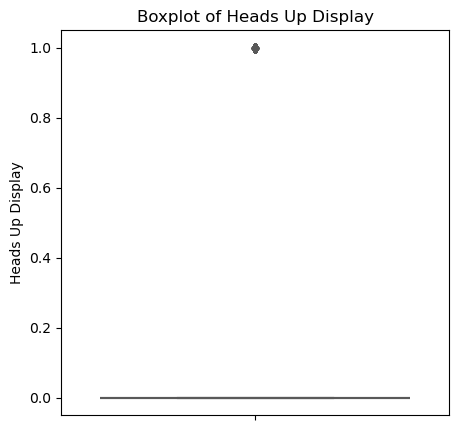

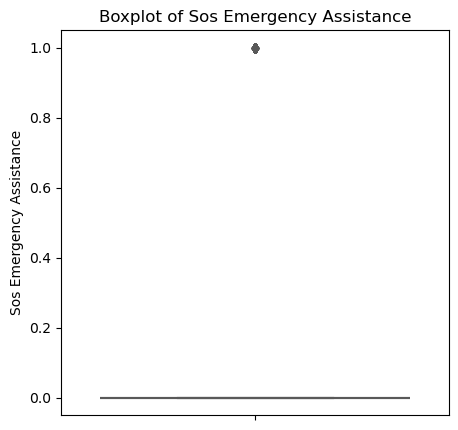

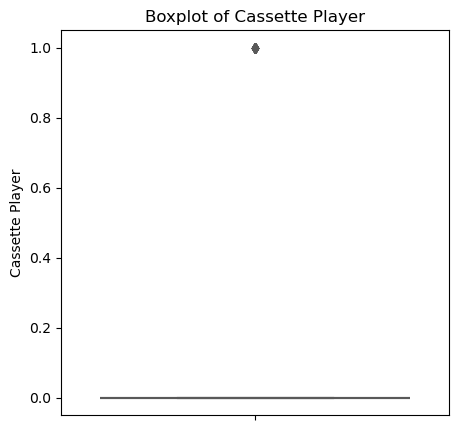

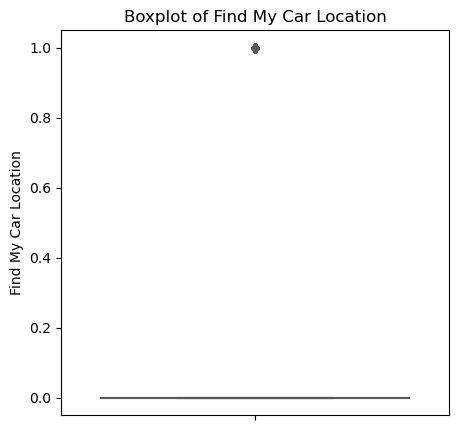

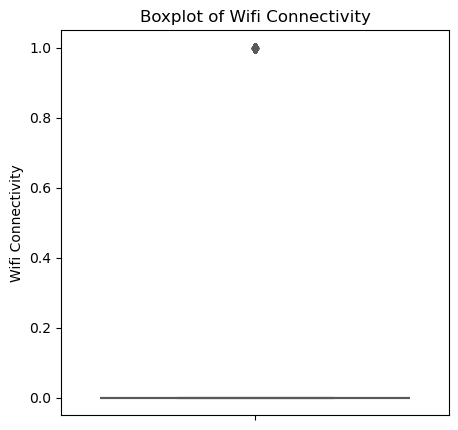

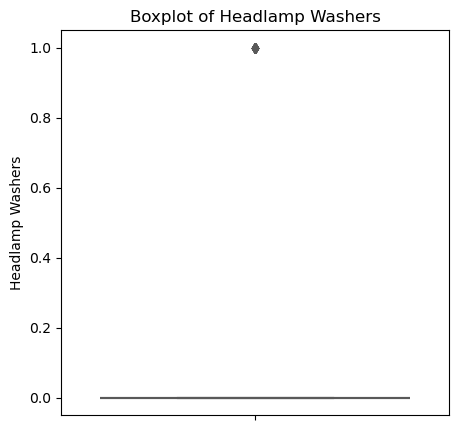

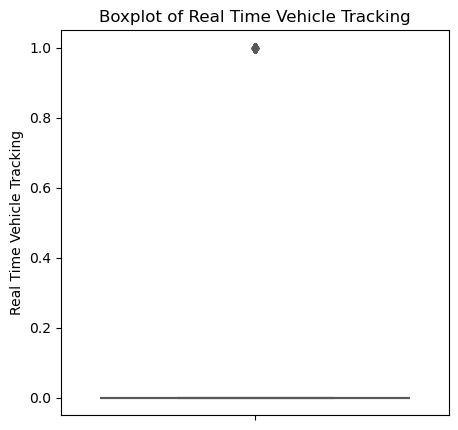

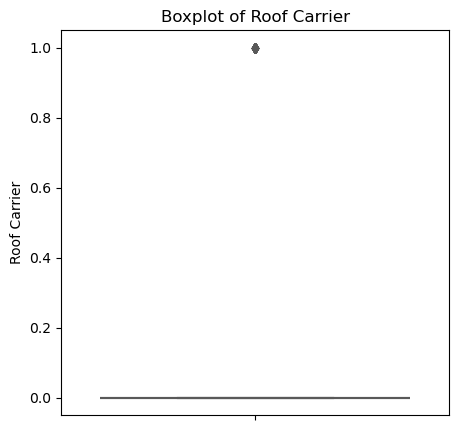

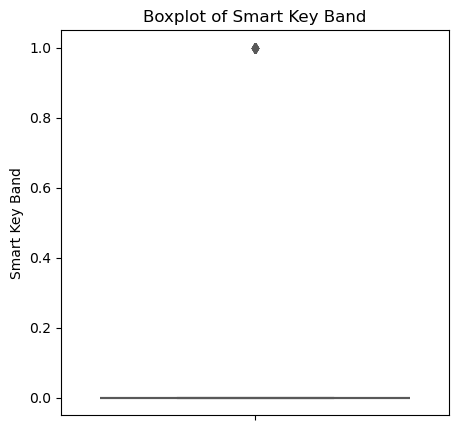

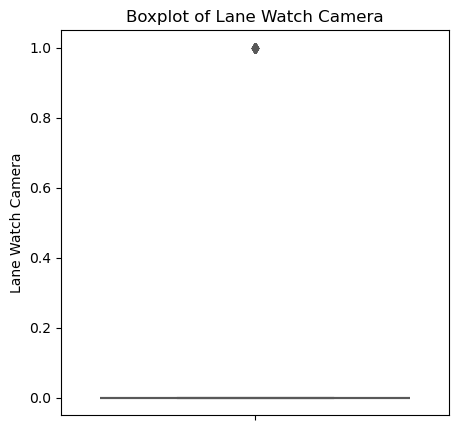

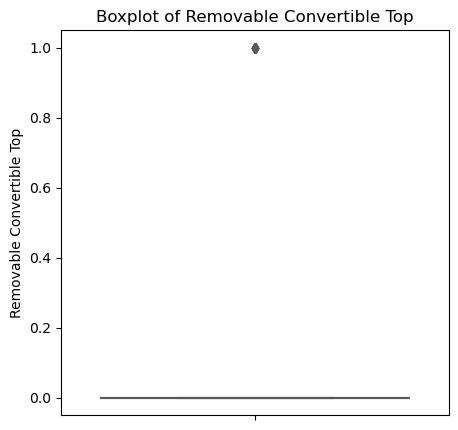

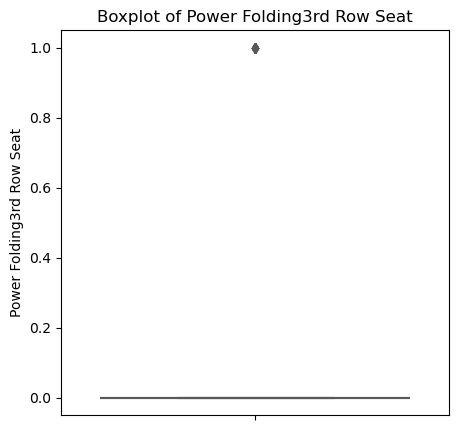

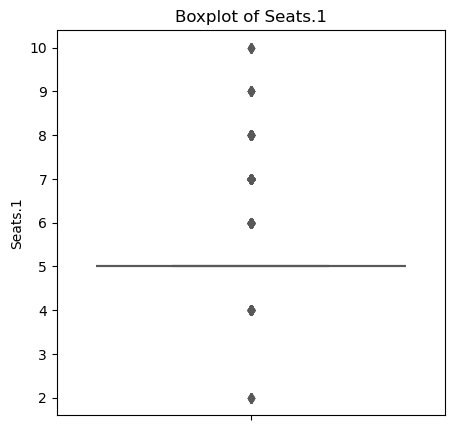

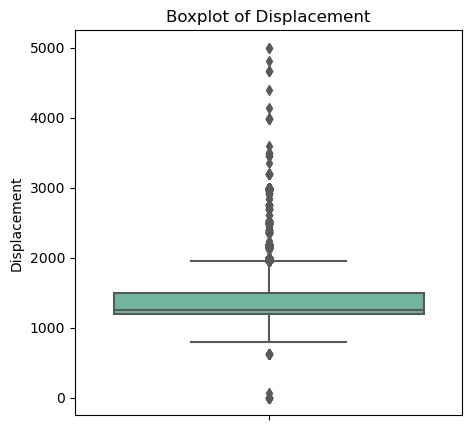

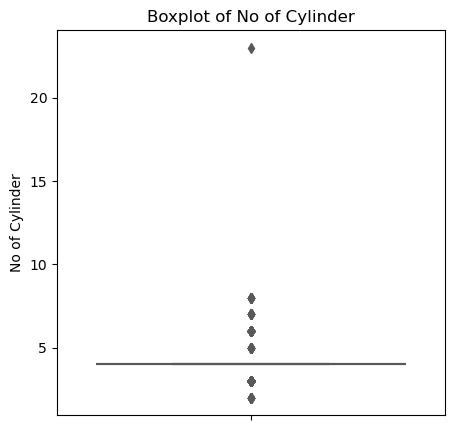

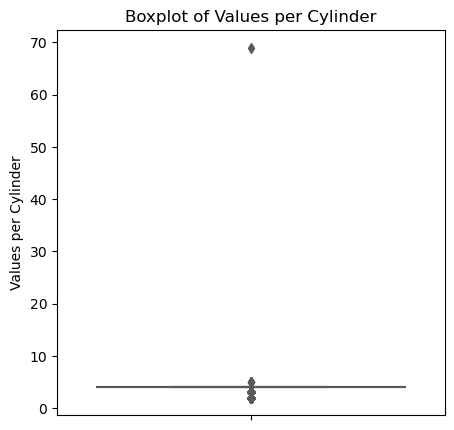

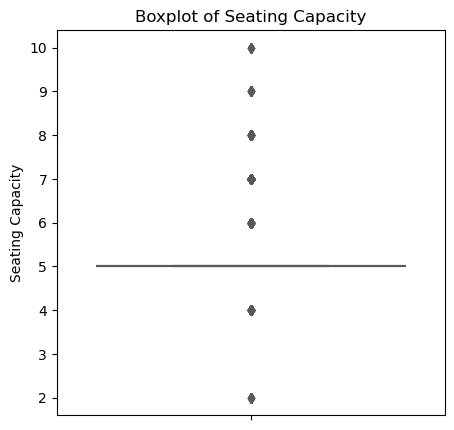

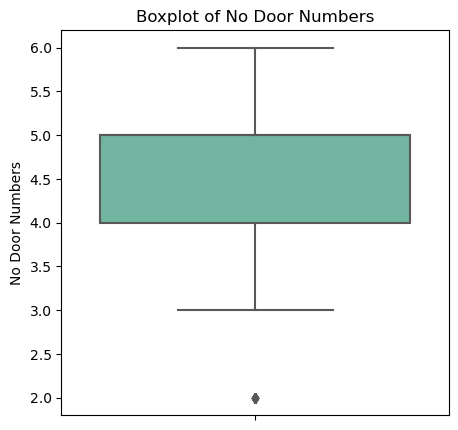

In [155]:
# Create a boxplot for each numerical column in the dataframe
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=df[col], palette="Set2")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [156]:
# Removing outliers using IQR method
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.05)
    Q3 = df[col].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        # Filter the data to remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print("Data after removing outliers:\n", df.describe())
print(df)

Data after removing outliers:
            it      ownerNo    modelYear  centralVariantId        price  \
count  3578.0  3578.000000  3578.000000       3578.000000  3578.000000   
mean      0.0     1.349357  2016.326998       4196.067636     6.825204   
std       0.0     0.592872     2.287512       2257.143768     4.893470   
min       0.0     0.000000  2007.000000          5.000000     1.000000   
25%       0.0     1.000000  2015.000000       1872.000000     4.250000   
50%       0.0     1.000000  2017.000000       4204.000000     5.685000   
75%       0.0     2.000000  2018.000000       5929.000000     7.617500   
max       0.0     5.000000  2023.000000      10519.000000    52.000000   

       Year of Manufacture  Power Steering  Power Windows Front  \
count          3578.000000          3578.0               3578.0   
mean           2016.326998             1.0                  1.0   
std               2.287512             0.0                  0.0   
min            2007.000000        

In [116]:
df["city"].unique()

array(['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Jaipur', 'Kolkata'],
      dtype=object)

In [157]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
le = LabelEncoder()

In [158]:
for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [159]:
df.head()

,it,ft,bt,transmission,ownerNo,oem,model,modelYear,centralVariantId,price,...,Seating Capacity,Steering Type,Turning Radius,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,city
0,0.0,2,1,1,3.0,12,59,2015,3979.0,4.00,...,5.0,4,3,9,101,9,5.0,15,2,0
1,0.0,2,3,1,2.0,5,22,2018,6087.0,8.11,...,5.0,4,14,31,65,11,4.0,41,2,0
2,0.0,2,1,1,1.0,18,102,2018,2983.0,5.85,...,5.0,4,5,9,94,5,5.0,17,0,0
3,0.0,2,4,1,1.0,7,42,2014,1867.0,4.62,...,5.0,4,3,40,93,11,4.0,55,0,0
4,0.0,1,3,1,1.0,12,66,2015,4277.0,7.90,...,5.0,4,12,53,58,11,5.0,42,2,0


In [182]:
target = df['price']

In [183]:
model_df = pd.concat([df, pd.Series(target, name='price')], axis=1)

In [184]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X = model_df.drop(columns='price')
y = model_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [185]:
print(f'R² score: {r2}')

R² score: 0.8688239854193601


In [186]:
#feature_importances = model.feature_importances_
#importances_df = pd.DataFrame({
#    'feature': X.columns,
#    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

In [187]:
#top_20_features = importances_df.head(20)
#print(top_20_features)

                                      feature  importance
194                                 Max Power    0.514978
208                                     Width    0.108975
18                        Year of Manufacture    0.054179
7                                   modelYear    0.051361
101            Driving Experience Control Eco    0.028244
212                                Rear Tread    0.022824
210                                Wheel Base    0.018965
211                               Front Tread    0.013792
74   Outside Rear View Mirror Turn Indicators    0.013397
225                                      city    0.011907
13                                 Kms Driven    0.009235
213                               Kerb Weight    0.008669
14                                        RTO    0.008468
9                           Registration Year    0.008341
207                                    Length    0.006651
220                              Acceleration    0.005030
8             

In [189]:
from sklearn.feature_selection import RFE
model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [190]:
selected_features = X_train.columns[rfe.support_]
selected_features.tolist()

['modelYear',
 'RTO',
 'Year of Manufacture',
 'Driving Experience Control Eco',
 'Max Power',
 'Width',
 'Wheel Base',
 'Rear Tread',
 'Kerb Weight',
 'Acceleration']

In [176]:
df[["Max Power","Width","modelYear","Year of Manufacture","city","Wheel Base","Kms Driven","Mileage","Acceleration","Color"]]

,Max Power,Width,modelYear,Year of Manufacture,city,Wheel Base,Kms Driven,Mileage,Acceleration,Color
0,11,11,2015,2015,0,8,0,192,101,75
1,104,44,2018,2018,0,23,31,67,65,75
2,45,14,2018,2018,0,5,10,198,94,60
3,36,16,2014,2014,0,8,16,113,93,48
4,51,51,2015,2015,0,35,59,195,58,32
...,...,...,...,...,...,...,...,...,...,...
8358,11,3,2015,2015,5,5,49,147,118,48
8362,25,20,2015,2015,5,15,69,52,93,48
8364,9,15,2022,2022,5,10,9,213,65,48
8367,47,19,2012,2012,5,2,39,100,100,48


In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, r2_score

In [193]:
X = df[['modelYear',
 'RTO',
 'Year of Manufacture',
 'Driving Experience Control Eco',
 'Max Power',
 'Width',
 'Wheel Base',
 'Rear Tread',
 'Kerb Weight',
 'Acceleration']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression
#linear_model = LinearRegression()
#linear_model.fit(X_train, y_train)
#y_pred_linear = linear_model.predict(X_test)
#mse = mean_squared_error(y_test, y_pred_linear)
#r2 = r2_score(y_test, y_pred_linear)
#print(f"  Mean Squared Error: {mse:.2f}")
#print(f"  R-squared: {r2:.2f}")
#print()

  Mean Squared Error: 7.79
  R-squared: 0.61



In [194]:
# 2. Decision Trees
#tree_model = DecisionTreeRegressor(random_state=42)
#tree_model.fit(X_train, y_train)
#y_pred_tree = tree_model.predict(X_test)
#mse = mean_squared_error(y_test, y_pred_tree) 
#r2 = r2_score(y_test, y_pred_tree)
#print(f"  Mean Squared Error: {mse:.2f}")
#print(f"  R-squared: {r2:.2f}")
#print()

  Mean Squared Error: 3.17
  R-squared: 0.84



In [195]:
#forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
#forest_model.fit(X_train, y_train)
#y_pred_forest = forest_model.predict(X_test)
#mse = mean_squared_error(y_test, y_pred_forest) 
#r2 = r2_score(y_test, y_pred_forest)
#print(f"  Mean Squared Error: {mse:.2f}")
#print(f"  R-squared: {r2:.2f}")
#print()

  Mean Squared Error: 2.44
  R-squared: 0.88



In [196]:
# 4. Gradient Boosting Machines
#gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
#gbm_model.fit(X_train, y_train)
#y_pred_gbm = gbm_model.predict(X_test)
#se = mean_squared_error(y_test, y_pred_gbm) 
#r2 = r2_score(y_test, y_pred_gbm)
#print(f"  Mean Squared Error: {mse:.2f}")
#print(f"  R-squared: {r2:.2f}")
#print()

  Mean Squared Error: 2.17
  R-squared: 0.89



In [227]:
#4. Gradient Boosting Machines
model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.2, random_state=42,max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_gbm) 
r2 = r2_score(y_test, y_pred_gbm)
print(f"  Mean Squared Error: {mse:.2f}")
print(f"  R-squared: {r2:.2f}")
print()

  Mean Squared Error: 1.87
  R-squared: 0.91



In [198]:
#KNeighborsRegressor
#from sklearn.neighbors import KNeighborsRegressor

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the KNeighborsRegressor model
#model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
# Train the model
#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)

#print(f"Mean Squared Error: {mse:.2f}")
#print(f"R-squared: {r2:.2f}")

Mean Squared Error: 5.38
R-squared: 0.73


In [199]:
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import GridSearchCV

# Initialize the GradientBoostingRegressor model
#gbm_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameter grid to search over
#param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform GridSearchCV for hyperparameter tuning
#grid_search = GridSearchCV(estimator=gbm_model, param_grid=param_grid, cv=5, scoring='r2')
#grid_search.fit(X_train, y_train)  # Replace X_train, y_train with your data

# Print the best parameters and best score
#print("Best parameters found: ", grid_search.best_params_)
#print("Best R-squared score: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Best R-squared score:  0.9102104963281837


In [213]:
#param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]}
#model = RandomForestRegressor()
#grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
#grid_search.fit(X_train, y_train)
#rint("Best parameters found: ", grid_search.best_params_)
#print("Best R-squared score: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best R-squared score:  0.8981915148480255


In [230]:
import pickle
pickle.dump(model,open("gb_car.pkl","wb"))

In [220]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
CarDekho/newone.ipynb
CarDekho